In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

# Predict the relation between BMI and year for some sports and overall

## Cleaning and Preparing Data:

In [3]:
olympicData = pd.read_csv('athlete_events.csv')

#Dropping columns that will not be used.
olympicData.columns
colDrop = ['Name','Games','City'] 
olympicData.drop(columns = colDrop, inplace = True)

#Replacing missing medal data.
olympicData['Medal'] = olympicData['Medal'].fillna('NoMedal')

#Replacing missing height values with an average value based on sex and country.
HeightNOC = olympicData[['Height', 'NOC','Sex']]
AvgHeight = HeightNOC.groupby(['NOC', 'Sex']).mean()
AvgHeight.rename(columns={"Height": "Avgheight"}, inplace=True)
olympicData = pd.merge(olympicData, AvgHeight, on = ['NOC','Sex'])
olympicData['Height'] = olympicData['Height'].fillna(olympicData['Avgheight'])

#Changing height units to metres.
olympicData['Height'] = olympicData['Height']/100

#Replacing weight values using the same method as height.
WeightNOC = olympicData[['Weight', 'NOC','Sex']]
AvgWeight = WeightNOC.groupby(['NOC', 'Sex']).mean()
AvgWeight.rename(columns={"Weight": "AvgWeight"}, inplace=True)
olympicData = pd.merge(olympicData, AvgWeight, on = ['NOC','Sex'])
olympicData['Weight'] = olympicData['Weight'].fillna(olympicData['AvgWeight'])

#Replacing age data with a overall mean.
AgeMean = olympicData['Age'].mean()
olympicData['Age'] = olympicData['Age'].fillna(AgeMean)

#Calculating BMI for each athlete.
olympicData['BMI'] = olympicData['Weight']/(olympicData['Height']**2)

#Removing remaining NaN values.
olympicData = olympicData[np.isfinite(olympicData['Height'])]
olympicData = olympicData[np.isfinite(olympicData['Weight'])]

#Seperating male and female athletes.
olympicDataM = olympicData[olympicData['Sex'] == 'M']
olympicDataF = olympicData[olympicData['Sex'] == 'F']

## Determining Correlation Between BMI and Year (Overall) :

Male :
           BMI      Year
BMI   1.000000  0.006214
Year  0.006214  1.000000


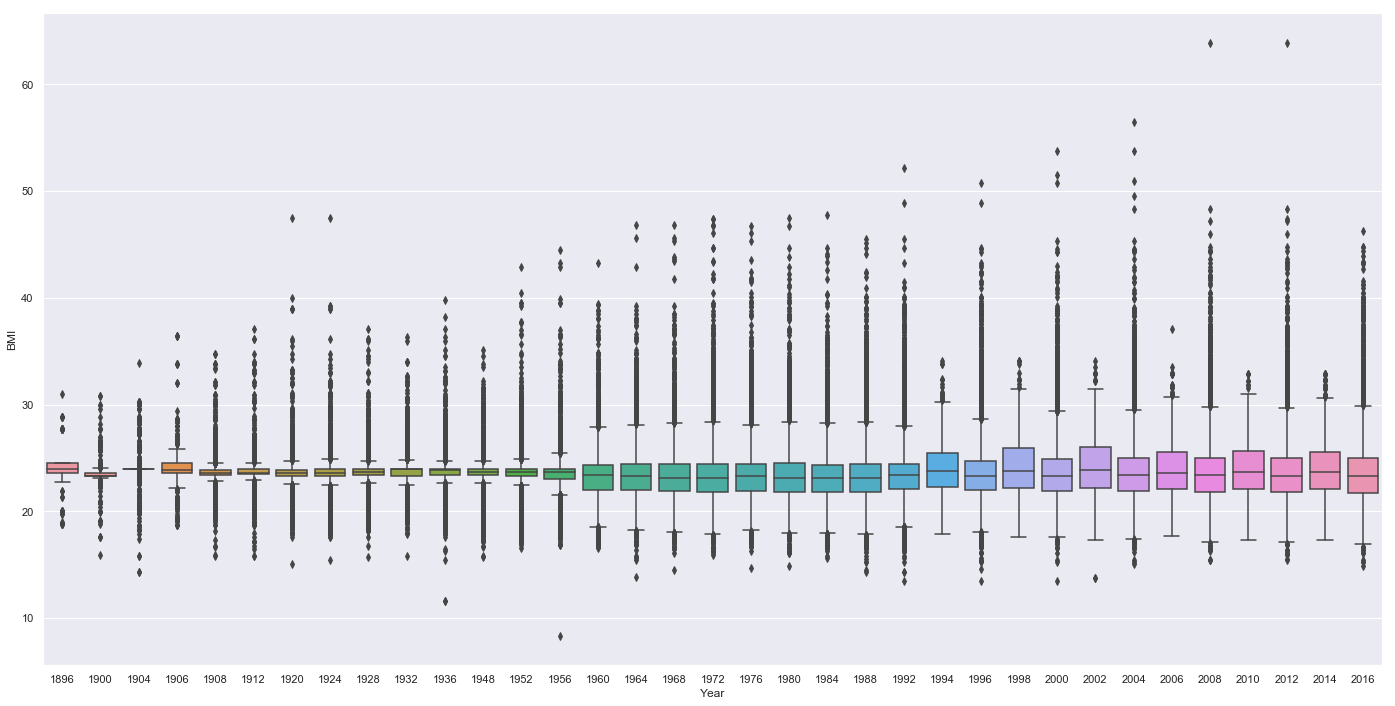

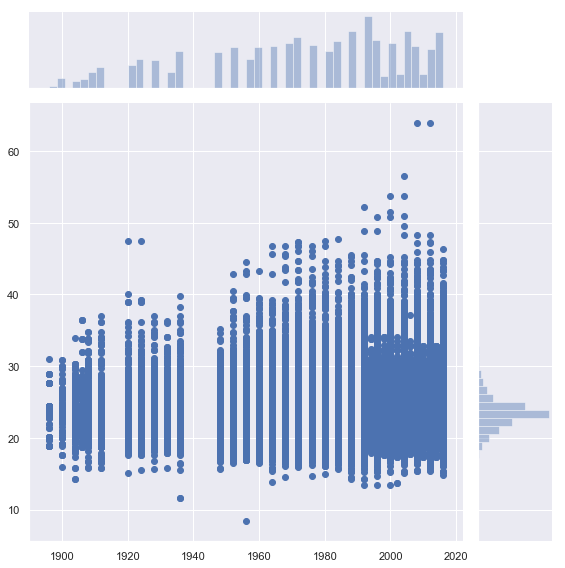

In [4]:
#Boxplots showing development of BMI for male athletes.
print('Male :')
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(y=olympicDataM['BMI'],x=olympicDataM['Year']) 

#Correlation between BMI and year. 
DataM = pd.DataFrame(olympicDataM[['BMI', 'Year']])
BMI = pd.DataFrame(olympicDataM['BMI']) 
Year = pd.DataFrame(olympicDataM['Year']) 
sb.jointplot(x = Year, y = BMI, height = 8)

print(DataM.corr())

Female :
           BMI      Year
BMI   1.000000  0.033631
Year  0.033631  1.000000


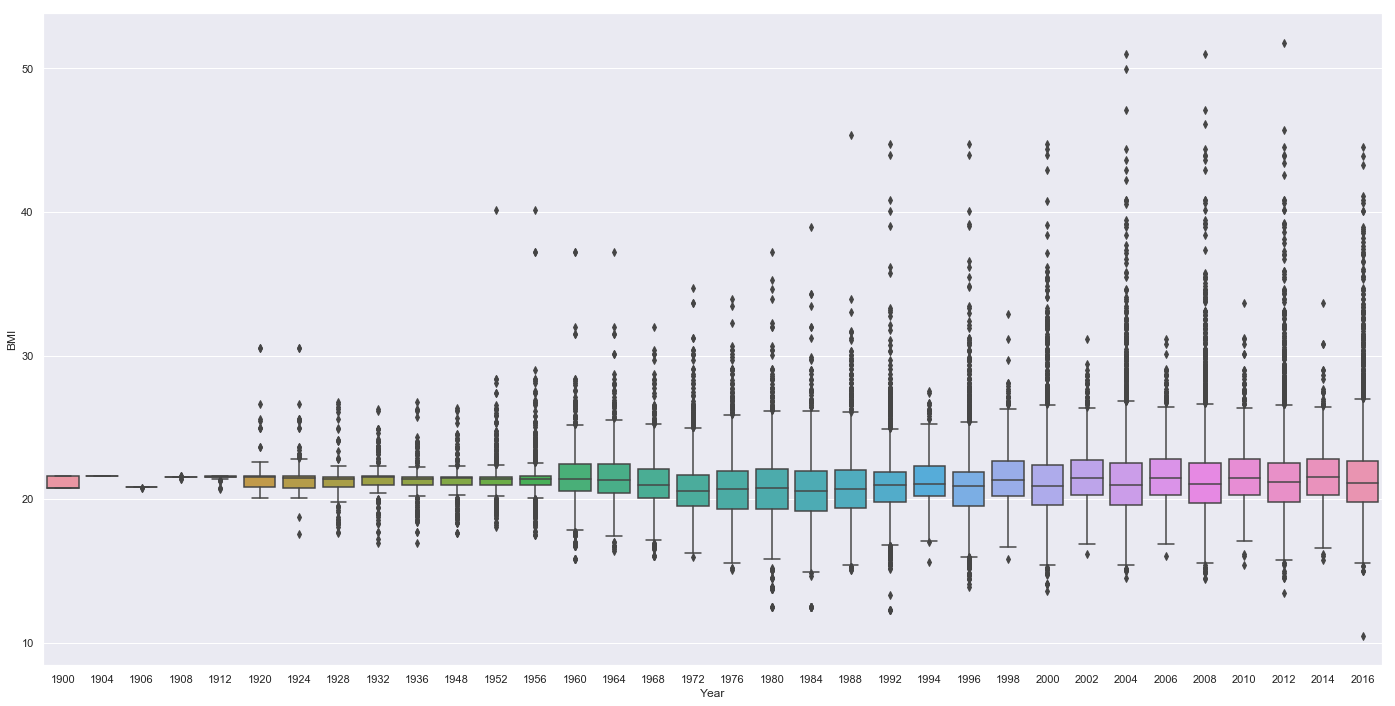

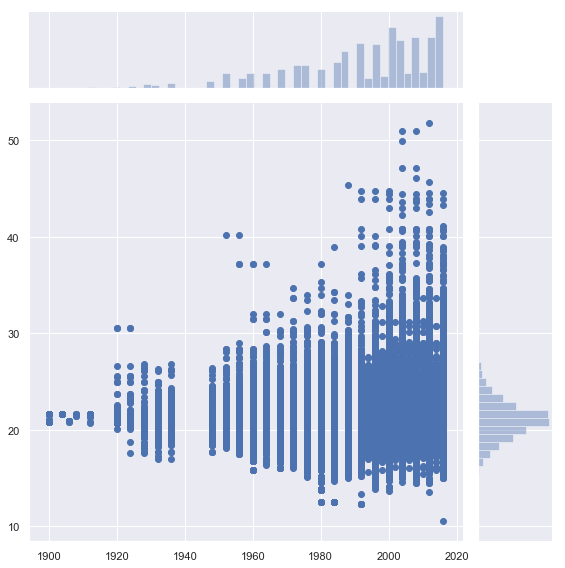

In [5]:
#Boxplots showing development of BMI for female athletes.
print('Female :')
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(y=olympicDataF['BMI'],x=olympicDataF['Year'])   

#Correlation between BMI and year. 
DataF = pd.DataFrame(olympicDataF[['BMI', 'Year']])
BMI = pd.DataFrame(olympicDataF['BMI']) 
Year = pd.DataFrame(olympicDataF['Year']) 
sb.jointplot(x = Year, y = BMI, height = 8)

print(DataF.corr())

## Determining Correlation Between BMI and Year (Sports wise) :

           BMI      Year
BMI   1.000000 -0.126742
Year -0.126742  1.000000


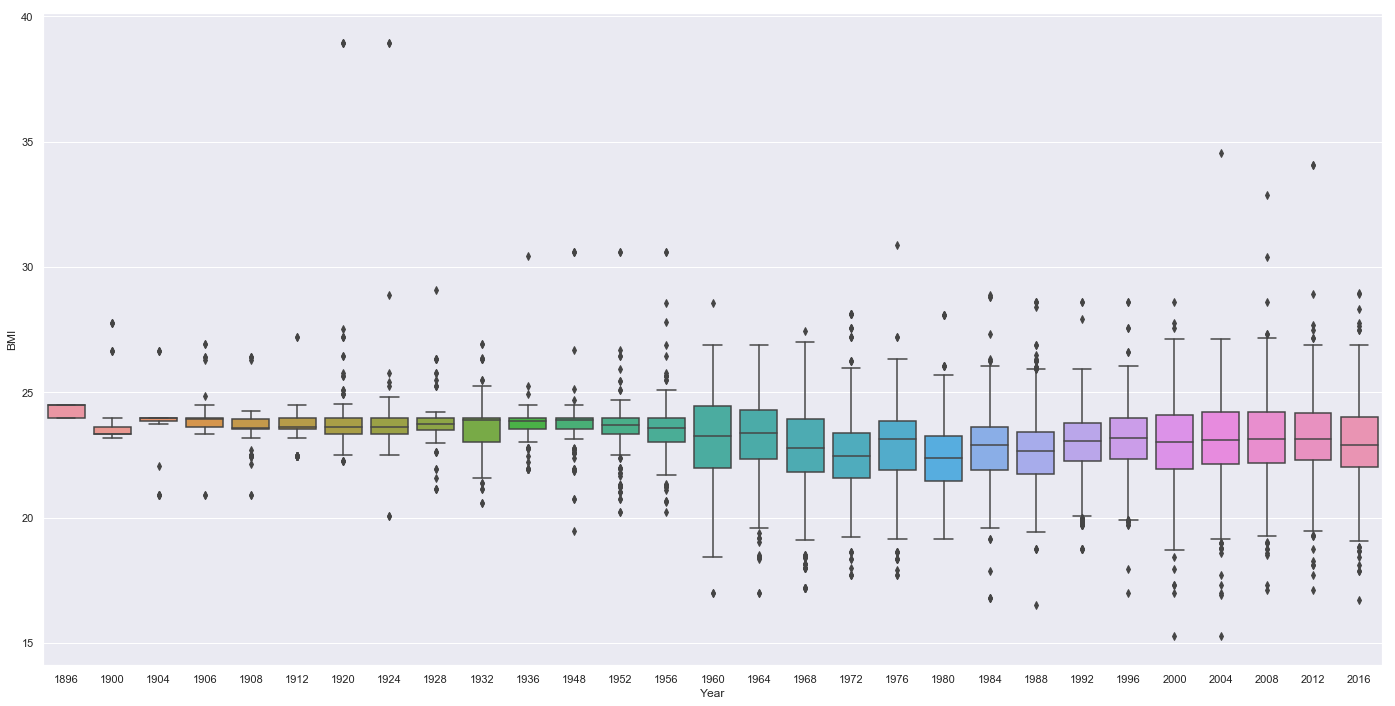

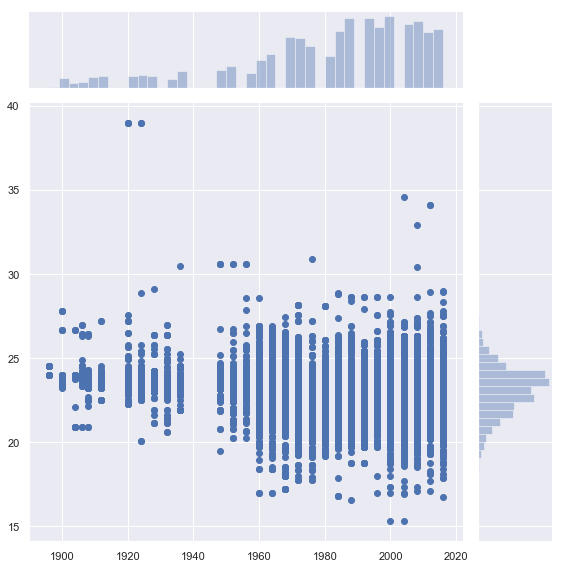

In [6]:
#Swimming - Men

SDataM = olympicDataM[olympicDataM['Sport'] == 'Swimming']

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(y=SDataM['BMI'],x=SDataM['Year']) 
 
DataM = pd.DataFrame(SDataM[['BMI', 'Year']])
BMI = pd.DataFrame(SDataM['BMI']) 
Year = pd.DataFrame(SDataM['Year']) 
sb.jointplot(x = Year, y = BMI, height = 8)

print(DataM.corr())

           BMI      Year
BMI   1.000000 -0.114764
Year -0.114764  1.000000


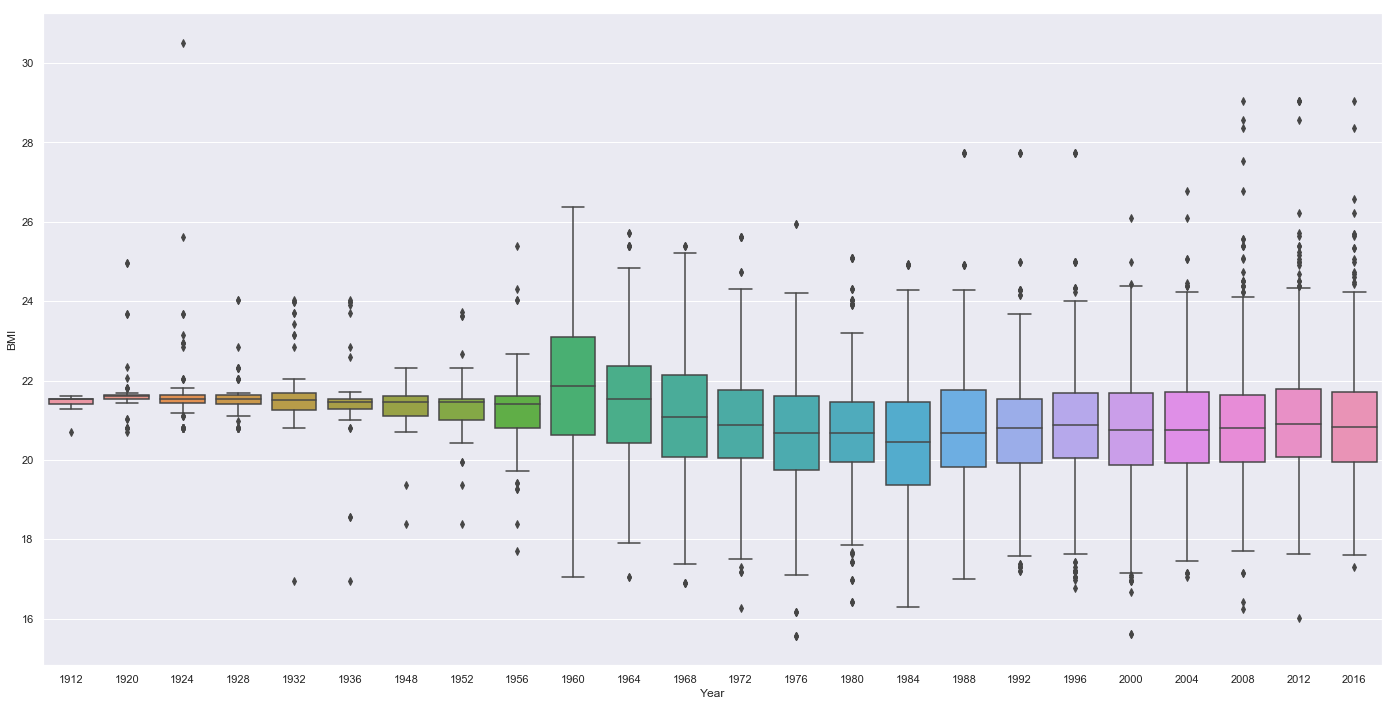

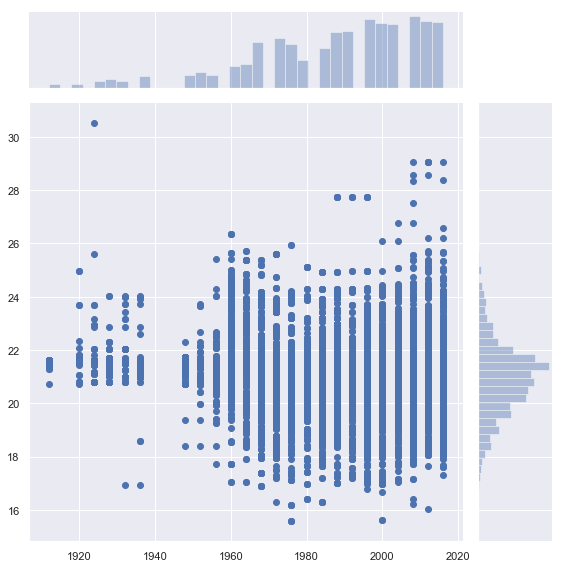

In [7]:
#Swimming - Women

SDataF = olympicDataF[olympicDataF['Sport'] == 'Swimming']

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(y=SDataF['BMI'],x=SDataF['Year']) 
 
DataM = pd.DataFrame(SDataF[['BMI', 'Year']])
BMI = pd.DataFrame(SDataF['BMI']) 
Year = pd.DataFrame(SDataF['Year']) 
sb.jointplot(x = Year, y = BMI, height = 8)

print(DataM.corr())

           BMI      Year
BMI   1.000000 -0.063247
Year -0.063247  1.000000


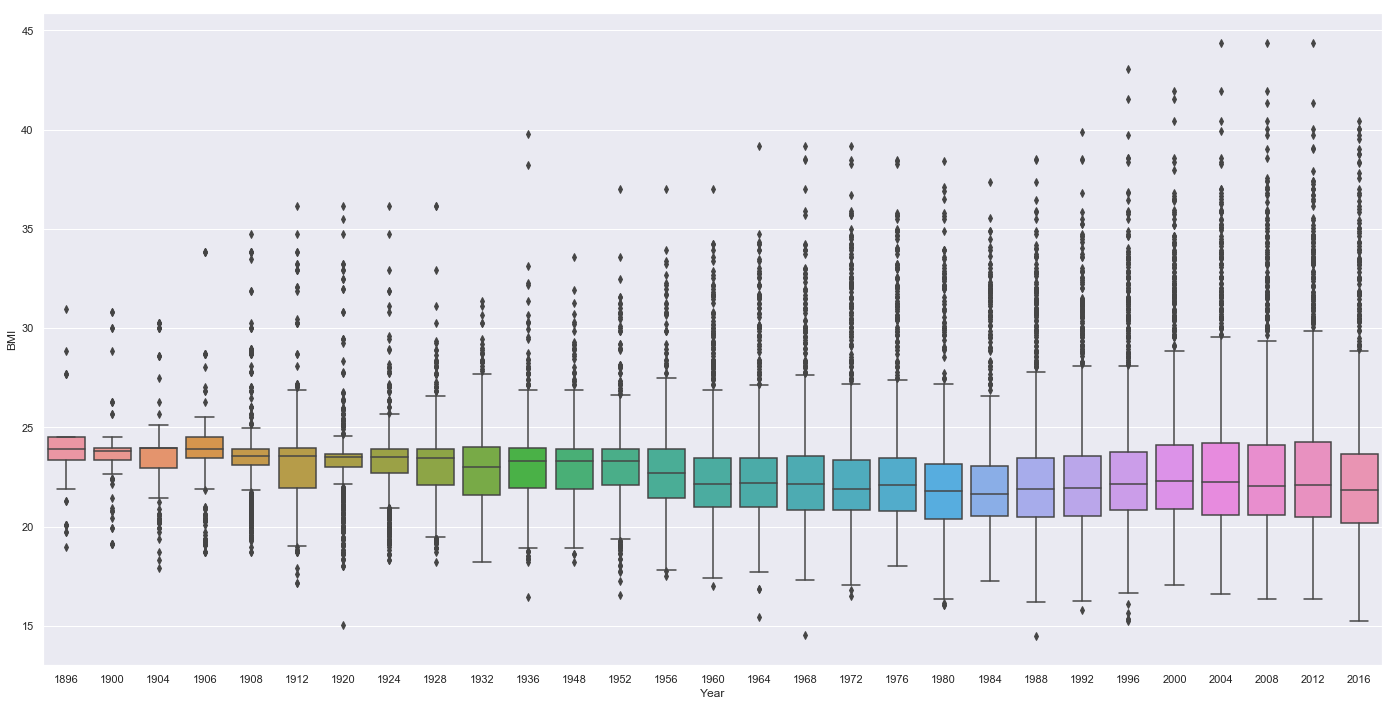

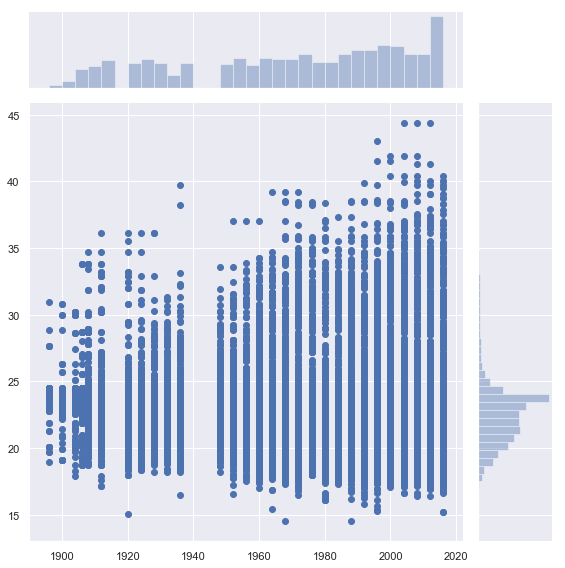

In [8]:
#Athletics - Men

ADataM = olympicDataM[olympicDataM['Sport'] == 'Athletics']

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(y=ADataM['BMI'],x=ADataM['Year']) 
 
DataM = pd.DataFrame(ADataM[['BMI', 'Year']])
BMI = pd.DataFrame(ADataM['BMI']) 
Year = pd.DataFrame(ADataM['Year']) 
sb.jointplot(x = Year, y = BMI, height = 8)

print(DataM.corr())

           BMI      Year
BMI   1.000000 -0.063247
Year -0.063247  1.000000


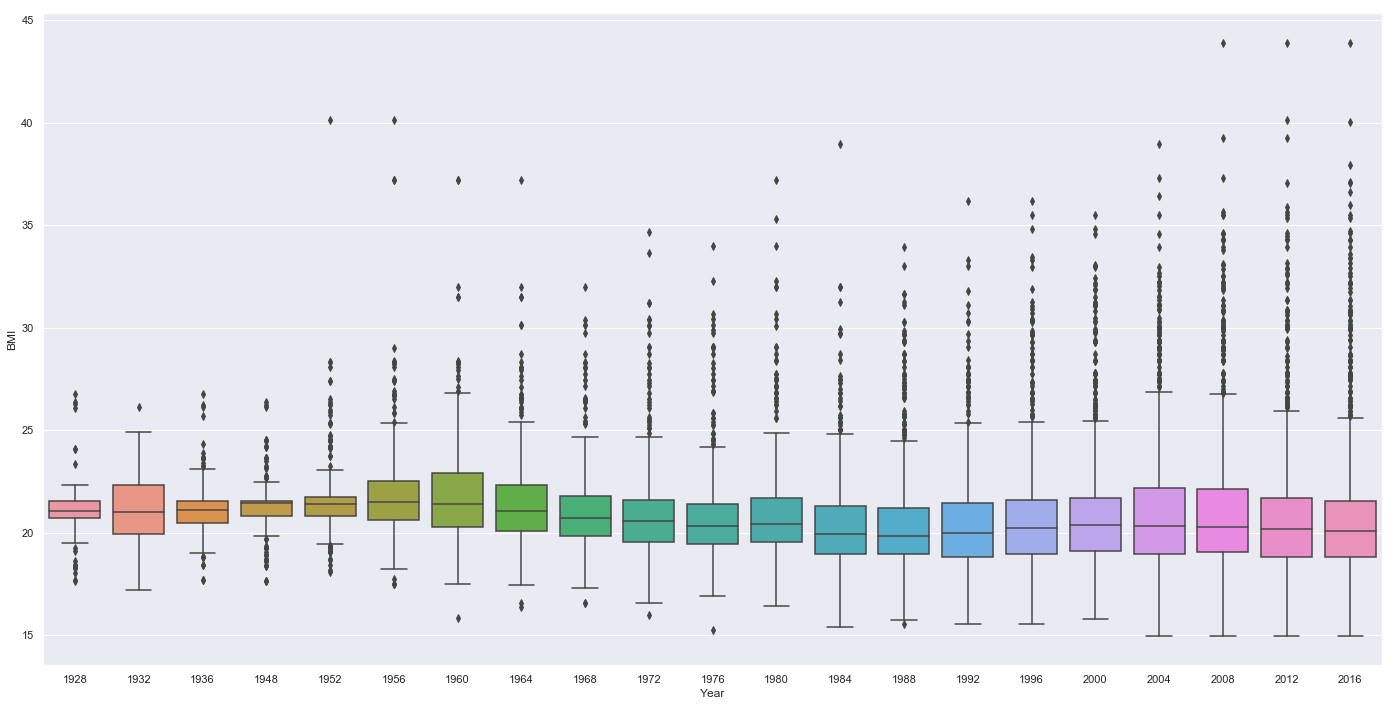

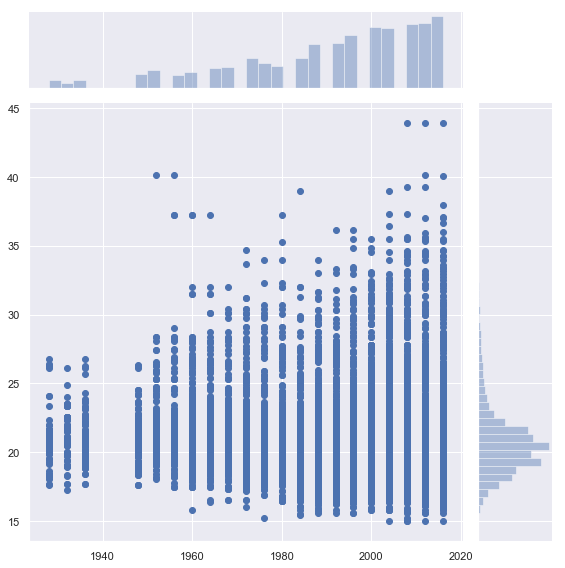

In [9]:
#Athletics - Women

ADataF = olympicDataF[olympicDataF['Sport'] == 'Athletics']

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(y=ADataF['BMI'],x=ADataF['Year']) 
 
DataF = pd.DataFrame(ADataF[['BMI', 'Year']])
BMI = pd.DataFrame(ADataF['BMI']) 
Year = pd.DataFrame(ADataF['Year']) 
sb.jointplot(x = Year, y = BMI, height = 8)

print(DataM.corr())

In [10]:
#The correlation coefficents suggest that there is there has been no positive or negative development in BMI 
# over the years. The boxplots however, suggest that the range of BMIs has increased overall.   

# Based on Height, Weight, BMI, predict whether the athlete will win a medal

In [11]:
olympicData = pd.read_csv('athlete_events.csv')
olympicData.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [12]:
print("Data Type:", type(olympicData))
print("Data Dims", olympicData.shape)

Data Type: <class 'pandas.core.frame.DataFrame'>
Data Dims (271116, 15)


In [13]:
olympicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Which Sports have too less data to consider?

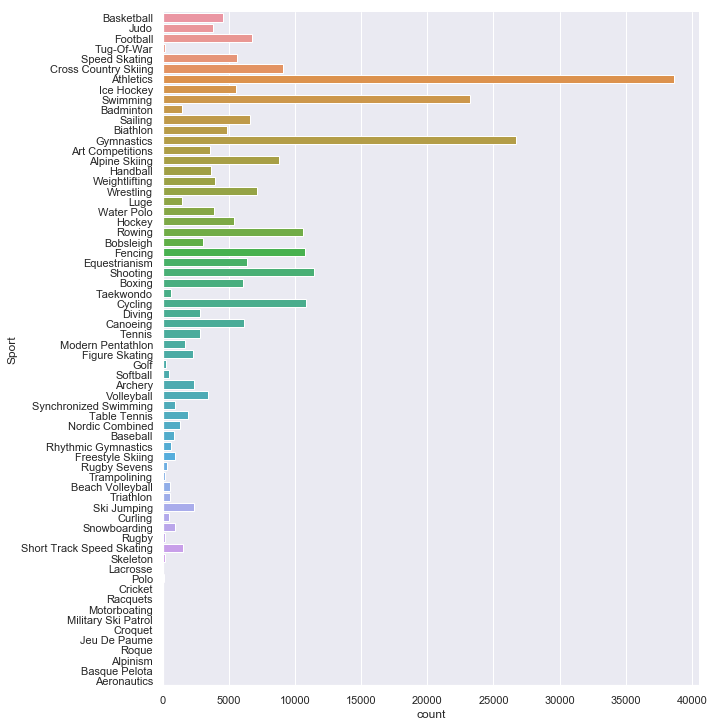

In [14]:
sb.catplot(y = "Sport", data = olympicData, kind = "count", height = 10)

## How many times was each event in the Olympics?

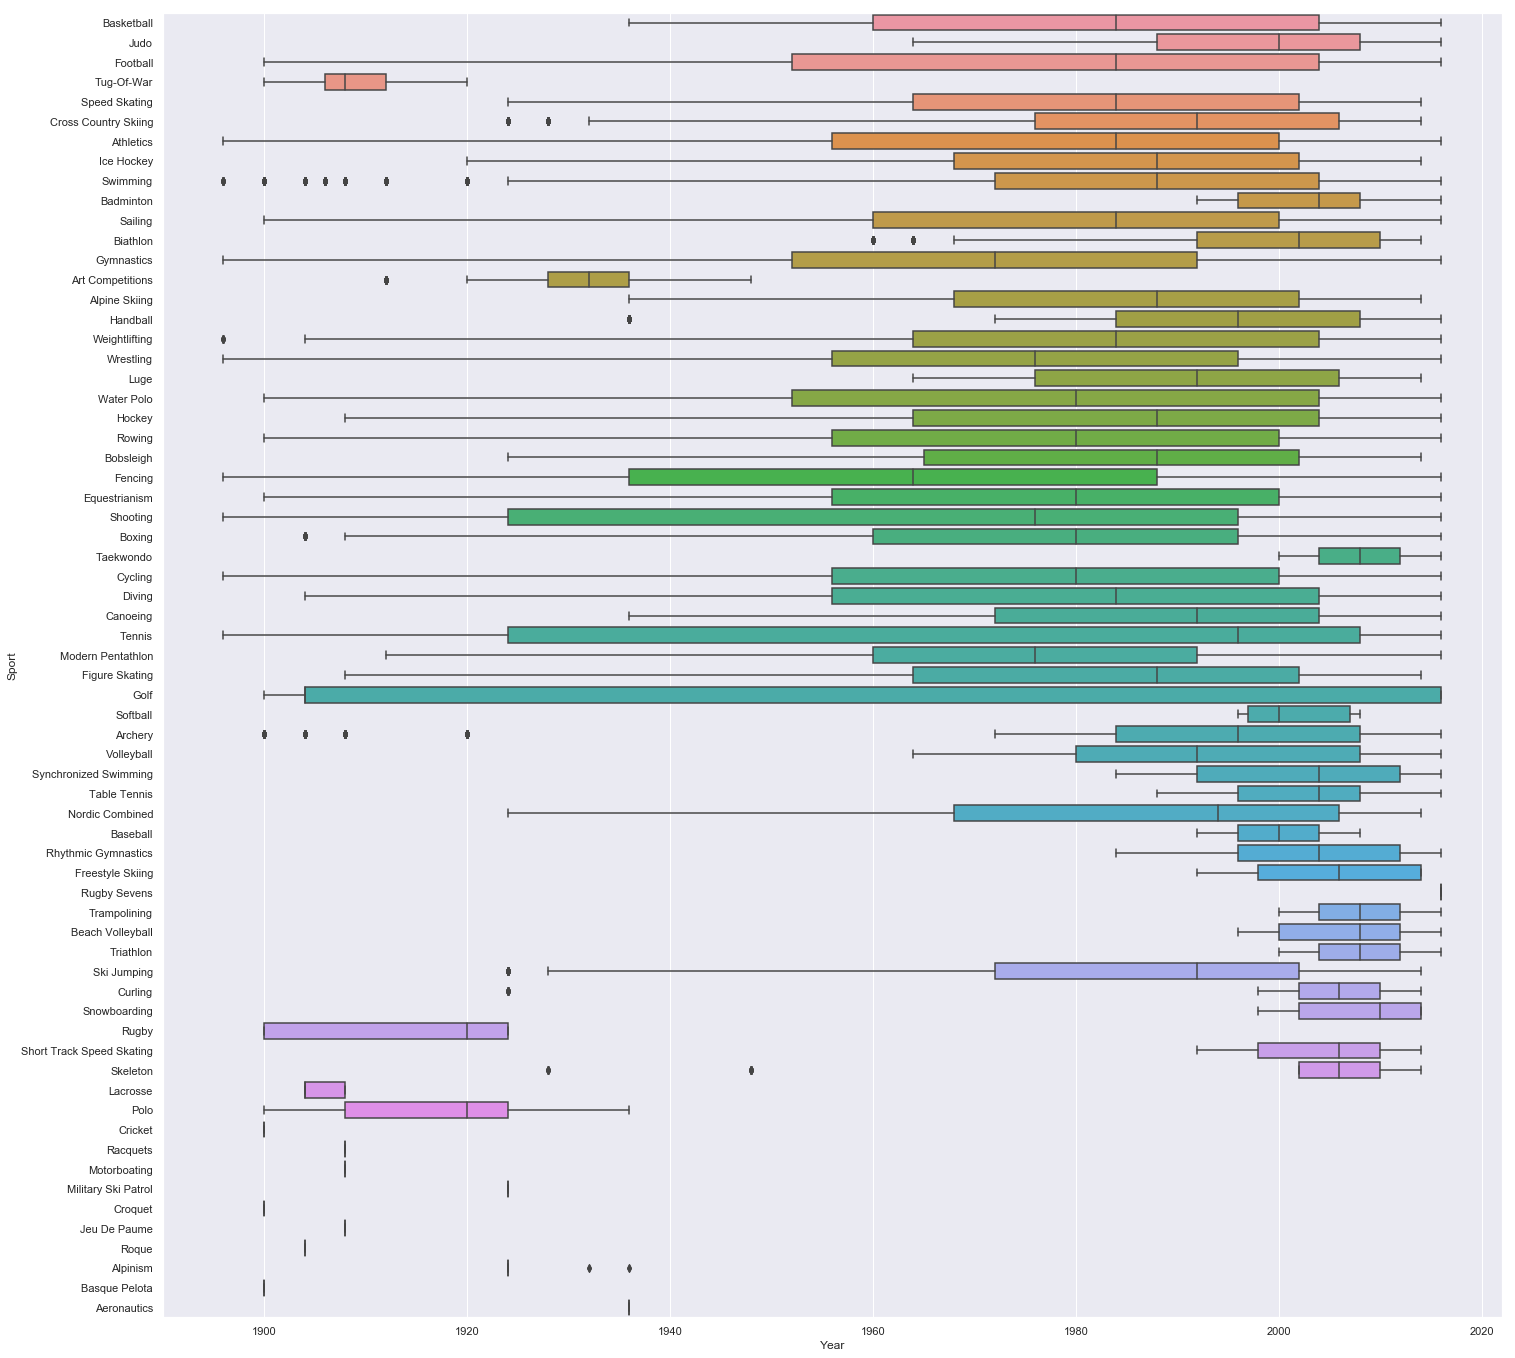

In [15]:
f, axes = plt.subplots(1, 1, figsize=(24, 24))
sb.boxplot(x = "Year", y = "Sport", data = olympicData)

In [16]:
print(olympicData['Sport'].value_counts())

Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Cross Country Skiing      9133
Alpine Skiing             8829
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing                  6171
Boxing                    6047
Speed Skating             5613
Ice Hockey                5516
Hockey                    5417
Biathlon                  4893
Basketball                4536
Weightlifting             3937
Water Polo                3846
Judo                      3801
Handball                  3665
Art Competitions          3578
Volleyball                3404
Bobsleigh                 3058
Tennis                    2862
Diving                    2842
Ski Jumping               2401
                         ...  
Badminton                 1457
Nordic C

In [17]:
lowOccurSport = ['Tug-Of-War', 'Golf', 'Trampolining', 'Skeleton', 'Rugby', 'Rugby Sevens', 
                 'Lacrosse', 'Polo', 'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
                 'Croquet', 'Jeu De Paume', 'Roque', 'Alpinism', 'Basque Pelota', 'Aeronautics', 'Art Competitions']

In [18]:
for item in lowOccurSport:
    lowOccurSportDf = olympicData[olympicData['Sport'].isin([item])]
    SortedDf = lowOccurSportDf.sort_values(by = "Year")
    display(SortedDf)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
94299,47727,Francis Henriquez de Zubira,M,30.0,NaN,NaN,Racing Club de France,COL,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Silver
171883,86368,August Nilsson,M,27.0,NaN,NaN,Denmark/Sweden,SWE,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
81555,41407,Charles Marius Duma Adolphe Gondouin,M,24.0,NaN,NaN,Racing Club de France,FRA,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Silver
210783,105848,mile Pierre Sarrade,M,23.0,NaN,NaN,Racing Club de France,FRA,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Silver
213255,107090,Eugen Stahl Schmidt,M,38.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
43457,22406,Jean Collas,M,25.0,NaN,NaN,Racing Club de France,FRA,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Silver
224416,112720,Gustaf Fredrik Sderstrm,M,34.0,NaN,NaN,Denmark/Sweden,SWE,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
227065,114107,Karl Gustaf Vilhelm Staaf (Johansson-),M,19.0,NaN,NaN,Denmark/Sweden,SWE,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
202943,101921,Louis Joseph Roffo,M,21.0,NaN,NaN,Racing Club de France,FRA,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Silver


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
131405,66137,"Albert Bond ""Al"" Lambert",M,24.0,167.0,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Men's Individual,NaN
58116,29749,William Bathurst Dove,M,28.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Golf,Golf Men's Individual,NaN
209892,105390,Charles Edward Sands,M,34.0,181.0,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Men's Individual,Gold
259872,130096,"Pauline ""Polly"" Whittier (-Iselin)",F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Silver
206566,103689,Walter Mathers Rutherford,M,42.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Golf,Golf Men's Individual,Silver
201793,101344,David Donaldson Robertson,M,31.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Golf,Golf Men's Individual,Bronze
66032,33784,Lucile Virginie Madeleine Fain (Condren-),F,32.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN
200456,100662,Ellen Richards Ridgway (Munroe-),F,33.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN
142500,71492,Arthur Power Lord,M,31.0,178.0,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Men's Individual,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
191096,95961,Dmitry Vladimirovich Polyarush,M,29.0,180.0,82.0,Belarus,BLR,2000 Summer,2000,Summer,Sydney,Trampolining,Trampolining Men's Individual,NaN
247104,123720,Petra Vachnkov,F,24.0,167.0,56.0,Czech Republic,CZE,2000 Summer,2000,Summer,Sydney,Trampolining,Trampolining Women's Individual,NaN
113506,57503,Irina Vladimirovna Karavayeva,F,25.0,165.0,52.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Trampolining,Trampolining Women's Individual,Gold
113925,57705,Nataliya Vladimirovna Karpenkova,F,30.0,156.0,47.0,Belarus,BLR,2000 Summer,2000,Summer,Sydney,Trampolining,Trampolining Women's Individual,NaN
56781,29095,Anna Aleksandre Dogonadze-Lilkendey,F,27.0,158.0,52.0,Germany,GER,2000 Summer,2000,Summer,Sydney,Trampolining,Trampolining Women's Individual,NaN
117085,59294,Yekaterina Viktorovna Khilko,F,18.0,163.0,51.0,Uzbekistan,UZB,2000 Summer,2000,Summer,Sydney,Trampolining,Trampolining Women's Individual,NaN
181861,91414,Jennifer Parilla,F,19.0,154.0,52.0,United States,USA,2000 Summer,2000,Summer,Sydney,Trampolining,Trampolining Women's Individual,NaN
43002,22175,Karen Cockburn (-Turgeon),F,19.0,161.0,55.0,Canada,CAN,2000 Summer,2000,Summer,Sydney,Trampolining,Trampolining Women's Individual,Bronze
117240,59372,Rusudan Khoperia,F,28.0,164.0,52.0,Georgia,GEO,2000 Summer,2000,Summer,Sydney,Trampolining,Trampolining Women's Individual,NaN
216866,108900,Michael Serth,M,25.0,185.0,77.0,Germany,GER,2000 Summer,2000,Summer,Sydney,Trampolining,Trampolining Men's Individual,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
92786,47007,Jennison Heaton,M,23.0,NaN,NaN,United States,USA,1928 Winter,1928,Winter,Sankt Moritz,Skeleton,Skeleton Men's Skeleton,Gold
175288,88091,David Ludovic George Hopetoun Carnegie,M,26.0,NaN,NaN,Great Britain,GBR,1928 Winter,1928,Winter,Sankt Moritz,Skeleton,Skeleton Men's Skeleton,Bronze
246351,123364,Franz Unterlechner,M,36.0,NaN,NaN,Austria,AUT,1928 Winter,1928,Winter,Sankt Moritz,Skeleton,Skeleton Men's Skeleton,NaN
254271,127309,Willy von Eschen,M,NaN,NaN,NaN,Switzerland,SUI,1928 Winter,1928,Winter,Sankt Moritz,Skeleton,Skeleton Men's Skeleton,NaN
20358,10738,Alexander Berner,M,NaN,NaN,NaN,Switzerland,SUI,1928 Winter,1928,Winter,Sankt Moritz,Skeleton,Skeleton Men's Skeleton,NaN
92783,47006,"John Rutherford ""Jack"" Heaton",M,19.0,NaN,NaN,United States,USA,1928 Winter,1928,Winter,Sankt Moritz,Skeleton,Skeleton Men's Skeleton,Silver
91585,46419,Louis Hasenknopf,M,37.0,NaN,NaN,Austria,AUT,1928 Winter,1928,Winter,Sankt Moritz,Skeleton,Skeleton Men's Skeleton,NaN
57662,29523,Pierre Joseph Dormeuil,M,40.0,198.0,88.0,France,FRA,1928 Winter,1928,Winter,Sankt Moritz,Skeleton,Skeleton Men's Skeleton,NaN
131886,66374,Agostino Lanfranchi,M,35.0,170.0,NaN,Italy,ITA,1928 Winter,1928,Winter,Sankt Moritz,Skeleton,Skeleton Men's Skeleton,NaN
52881,27152,Alessandro Enrico Del Torso,M,44.0,NaN,NaN,Italy,ITA,1928 Winter,1928,Winter,Sankt Moritz,Skeleton,Skeleton Men's Skeleton,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2761,1538,Vladimir Atoff,M,20.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,FRA,1900 Summer,1900,Summer,Paris,Rugby,Rugby Men's Rugby,Gold
210784,105848,mile Pierre Sarrade,M,23.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,FRA,1900 Summer,1900,Summer,Paris,Rugby,Rugby Men's Rugby,Gold
54598,28003,Clement Pemberton Deykin,M,22.0,NaN,NaN,Moseley Wanderers,GBR,1900 Summer,1900,Summer,Paris,Rugby,Rugby Men's Rugby,Silver
204073,102452,Cornelius Louis Andr Roosevelt,M,21.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,USA,1900 Summer,1900,Summer,Paris,Rugby,Rugby Men's Rugby,Gold
201056,101000,Andr Flix Rischmann,M,18.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,FRA,1900 Summer,1900,Summer,Paris,Rugby,Rugby Men's Rugby,Gold
142952,71735,Herbert Arthur Loveitt,M,26.0,180.0,71.0,Moseley Wanderers,GBR,1900 Summer,1900,Summer,Paris,Rugby,Rugby Men's Rugby,Silver
198836,99862,Heinrich Reitz,M,NaN,NaN,NaN,Frankfurt Club,GER,1900 Summer,1900,Summer,Paris,Rugby,Rugby Men's Rugby,Silver
198472,99656,"Franois tienne ""Frantz"" Reichel",M,29.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,FRA,1900 Summer,1900,Summer,Paris,Rugby,Rugby Men's Rugby,Gold
191680,96234,Eduard Poppe,M,NaN,NaN,NaN,Frankfurt Club,GER,1900 Summer,1900,Summer,Paris,Rugby,Rugby Men's Rugby,Silver
187864,94393,Alexandre Emmanuel Pharamond,M,23.0,164.0,70.0,Union des Socits Franais de Sports Athletiques,FRA,1900 Summer,1900,Summer,Paris,Rugby,Rugby Men's Rugby,Gold


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
769,442,"Catherine ""Kate"" Abilla Awino",F,27.0,162.0,56.0,Kenya,KEN,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,NaN
189128,95002,Ben Pinkelman,M,22.0,193.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Men's Rugby Sevens,NaN
184686,92831,Evania Pelite,F,21.0,169.0,67.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,Gold
182601,91785,Shannon Parry,F,26.0,170.0,70.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,Gold
181838,91399,Stephen Parez,M,22.0,174.0,75.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Men's Rugby Sevens,NaN
181720,91336,Jesse Parahi,M,27.0,189.0,104.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Men's Rugby Sevens,NaN
181693,91318,Karen Paquin,F,29.0,172.0,70.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,Bronze
189767,95309,Brbara Pla Vegu,F,33.0,162.0,61.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,NaN
179642,90277,Camilyne Oyuayo Awour,F,34.0,167.0,72.0,Kenya,KEN,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,NaN
179335,90119,Oscar Ouma Achieng,M,27.0,186.0,105.0,Kenya,KEN,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Men's Rugby Sevens,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
101049,51095,"Thomas ""Tom"" Hunter",M,NaN,NaN,NaN,St. Louis Amateur Athletic Association,USA,1904 Summer,1904,Summer,St. Louis,Lacrosse,Lacrosse Men's Lacrosse,Silver
88696,44967,Half Moon,M,NaN,NaN,NaN,Mohawk Indians-2,CAN,1904 Summer,1904,Summer,St. Louis,Lacrosse,Lacrosse Men's Lacrosse,Bronze
105811,53528,Benjamin Jamieson,M,30.0,NaN,75.0,Winnipeg Shamrocks-1,CAN,1904 Summer,1904,Summer,St. Louis,Lacrosse,Lacrosse Men's Lacrosse,Gold
131088,65981,Stuart Ralston Laidlaw,M,27.0,168.0,60.0,Winnipeg Shamrocks-1,CAN,1904 Summer,1904,Summer,St. Louis,Lacrosse,Lacrosse Men's Lacrosse,Gold
138963,69805,Lightfoot,M,NaN,NaN,NaN,Mohawk Indians-2,CAN,1904 Summer,1904,Summer,St. Louis,Lacrosse,Lacrosse Men's Lacrosse,Bronze
144683,72613,Hilliard Lyle,M,24.0,NaN,NaN,Winnipeg Shamrocks-1,CAN,1904 Summer,1904,Summer,St. Louis,Lacrosse,Lacrosse Men's Lacrosse,Gold
148003,74275,Man Afraid Soap,M,NaN,NaN,NaN,Mohawk Indians-2,CAN,1904 Summer,1904,Summer,St. Louis,Lacrosse,Lacrosse Men's Lacrosse,Bronze
166360,83554,William Arthur Murphy,M,37.0,NaN,NaN,St. Louis Amateur Athletic Association,USA,1904 Summer,1904,Summer,St. Louis,Lacrosse,Lacrosse Men's Lacrosse,Silver
171418,86149,Night Hawk,M,NaN,NaN,NaN,Mohawk Indians-2,CAN,1904 Summer,1904,Summer,St. Louis,Lacrosse,Lacrosse Men's Lacrosse,Bronze
182709,91840,William Partridge,M,NaN,NaN,NaN,St. Louis Amateur Athletic Association,USA,1904 Summer,1904,Summer,St. Louis,Lacrosse,Lacrosse Men's Lacrosse,Silver


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
263255,131733,William Hayden Wright,M,NaN,NaN,NaN,A North American Team,USA,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,Bronze
72576,36914,"Frederick Charles Maitland ""Freddie"" Freake",M,24.0,NaN,NaN,"BLO Polo Club, Rugby",GBR,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,Silver
71788,36535,Mortimer Henri Robert Fournier-Sarlovze,M,31.0,NaN,NaN,"Bagatelle Polo Club, Paris",FRA,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,Bronze
115236,58391,Foxhall Parker Keene,M,32.0,NaN,NaN,Foxhunters Hurlingham,USA,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,Gold
67019,34273,William Auguste Fauquet-Lematre,M,37.0,NaN,NaN,Compigne Polo Club,FRA,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,NaN
64706,33109,Jos Pablo Eustaquio Manuel Francisco Escandn y...,M,44.0,NaN,NaN,A North American Team,MEX,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,Bronze
64704,33107,Jos Manuel Mara del Corazn de Jess Escandn y B...,M,42.0,NaN,NaN,A North American Team,MEX,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,Bronze
64703,33106,Jos Eustaquio Luis Francisco Escandn y Barrn,M,38.0,NaN,NaN,A North American Team,MEX,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,Bronze
145570,73056,Frank Jay Mackey,M,48.0,178.0,NaN,Foxhunters Hurlingham,USA,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,Gold
51783,26608,douard Alphonse de Rothschild,M,32.0,NaN,NaN,"Bagatelle Polo Club, Paris",FRA,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,Bronze


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6892,3871,William Wallace Anderson,M,40.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,GBR,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men's Cricket,Silver
237943,119315,"Henry John Terry, Jr.",M,31.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,GBR,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men's Cricket,Silver
233773,117244,John Symes,M,21.0,NaN,NaN,Devon and Somerset Wanderers,GBR,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men's Cricket,Gold
213576,107247,Alfred John Schneidau,M,33.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,GBR,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men's Cricket,Silver
204130,102484,H. F. Roques,M,NaN,NaN,NaN,Union des Socits Franais de Sports Athletiques,FRA,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men's Cricket,Silver
201962,101432,Douglas Francis Robinson,M,35.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,GBR,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men's Cricket,Silver
192493,96654,Alfred James Powlesland,M,24.0,NaN,NaN,Devon and Somerset Wanderers,GBR,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men's Cricket,Gold
145261,72906,Arthur MacEvoy,M,31.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,GBR,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men's Cricket,Silver
110525,55887,Timothe Jordan,M,35.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,GBR,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men's Cricket,Silver
98751,49978,Robert Horne,M,NaN,NaN,NaN,Union des Socits Franais de Sports Athletiques,GBR,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men's Cricket,Silver


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
10460,5716,John Jacob Astor,M,21.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Racquets,Racquets Men's Singles,Bronze
10461,5716,John Jacob Astor,M,21.0,NaN,NaN,Great Britain-1,GBR,1908 Summer,1908,Summer,London,Racquets,Racquets Men's Doubles,Gold
29911,15435,Henry Brougham,M,19.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Racquets,Racquets Men's Singles,Bronze
30250,15621,Cecil Le Cronier Browning,M,25.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Racquets,Racquets Men's Singles,NaN
30251,15621,Cecil Le Cronier Browning,M,25.0,NaN,NaN,Great Britain-2,GBR,1908 Summer,1908,Summer,London,Racquets,Racquets Men's Doubles,Silver
32641,16786,Edmond William Bury,M,23.0,NaN,NaN,Great Britain-2,GBR,1908 Summer,1908,Summer,London,Racquets,Racquets Men's Doubles,Silver
134199,67568,Henry Meredith Leaf,M,45.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Racquets,Racquets Men's Singles,Silver
134200,67568,Henry Meredith Leaf,M,45.0,NaN,NaN,Great Britain-3,GBR,1908 Summer,1908,Summer,London,Racquets,Racquets Men's Doubles,Bronze
172624,86723,Evan Baillie Noel,M,29.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Racquets,Racquets Men's Singles,Gold
172625,86723,Evan Baillie Noel,M,29.0,NaN,NaN,Great Britain-3,GBR,1908 Summer,1908,Summer,London,Racquets,Racquets Men's Doubles,Bronze


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
10649,5822,George H. Atkinson,M,NaN,NaN,NaN,Wolseley-Siddeley-1,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed A-Class (Open),NaN
259371,129853,Hugh Richard Arthur Grosvenor,M,29.0,NaN,NaN,Wolseley-Siddeley-1,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed A-Class (Open),NaN
239707,120129,"Ernest Blakelock ""mile"" Thubron",M,46.0,NaN,NaN,Camille,FRA,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed A-Class (Open),Gold
239605,120083,Isaac Thomas Thornycroft,M,26.0,NaN,NaN,Gyrinus-1,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed C-Class,Gold
239604,120083,Isaac Thomas Thornycroft,M,26.0,NaN,NaN,Gyrinus-1,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed B-Class (Under 60 Feet),Gold
198178,99504,Bernard Boverton Redwood,M,33.0,NaN,NaN,Gyrinus-1,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed C-Class,Gold
198177,99504,Bernard Boverton Redwood,M,33.0,NaN,NaN,Gyrinus-1,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed B-Class (Under 60 Feet),Gold
259381,129861,Thomas Douglas Wynn Weston,M,NaN,NaN,NaN,Sea Dog-2,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed C-Class,NaN
133820,67386,Joseph Frederick Laycock,M,40.0,NaN,NaN,Wolseley-Siddeley-1,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed A-Class (Open),NaN
82391,41857,"Sophia Hope Gorham (Hallowes-, -Compton)",F,26.0,NaN,NaN,Quicksilver-2,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed B-Class (Under 60 Feet),NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
10854,5932,Alfred Aufdenblatten,M,26.0,NaN,NaN,Switzerland,SUI,1924 Winter,1924,Winter,Chamonix,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Gold
250618,125524,Denis Louis Vaucher,M,25.0,NaN,NaN,Switzerland,SUI,1924 Winter,1924,Winter,Chamonix,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Gold
249740,125054,Adrien Louis Albert Vandelle,M,21.0,NaN,NaN,France,FRA,1924 Winter,1924,Winter,Chamonix,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Bronze
160484,80519,Jan Mittlhner,M,NaN,NaN,NaN,Czechoslovakia,TCH,1924 Winter,1924,Winter,Chamonix,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,NaN
152844,76706,"Herman Vilhelm ""Ville"" Mattila",M,20.0,NaN,NaN,Finland,FIN,1924 Winter,1924,Winter,Chamonix,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Silver
148195,74363,Gabriel Maurice Mandrillon,M,21.0,NaN,NaN,France,FRA,1924 Winter,1924,Winter,Chamonix,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Bronze
148194,74362,Paul Camille Albert Mandrillon,M,32.0,NaN,NaN,France,FRA,1924 Winter,1924,Winter,Chamonix,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Bronze
130866,65875,Goffredo Lagger,M,NaN,NaN,NaN,Italy,ITA,1924 Winter,1924,Winter,Chamonix,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,NaN
111802,56606,Stanisaw Kdzioka,M,22.0,NaN,NaN,Poland,POL,1924 Winter,1924,Winter,Chamonix,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,NaN
111156,56239,Anton Julen,M,25.0,NaN,NaN,Switzerland,SUI,1924 Winter,1924,Winter,Chamonix,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Gold


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
10961,5989,Gaston Achille Louis Aumoitte,M,15.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",Gold
252568,126476,Maurice Marie Joseph Vignerot,M,20.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, Two Balls",Silver
211411,106157,Marie Maurice Jacques Alfred Sautereau,M,39.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, Two Balls",Bronze
211410,106157,Marie Maurice Jacques Alfred Sautereau,M,39.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN
175579,88258,Marie Pierrette Sophie Pauline Ohier,F,46.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, Two Balls",NaN
175578,88258,Marie Pierrette Sophie Pauline Ohier,F,46.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN
109352,55286,Georges douard Johin,M,22.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,Croquet Mixed Doubles,Gold
109351,55286,Georges douard Johin,M,22.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",Silver
257686,129049,Chrtien Andr Waydelich,M,58.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",Bronze
88054,44641,Marcel Hantjens,M,30.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, Two Balls",NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
21488,11349,Edwin Anthony Biedermann (-Best),M,30.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN
37344,19192,William Marshall Cazalet,M,42.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN
82805,42060,"Jay Gould, II",M,19.0,NaN,NaN,United States,USA,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,Gold
144851,72692,Neville Stephen Bulwer-Lytton,M,29.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,Bronze
158944,79794,Eustace Hamilton Miles,M,39.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,Silver
172623,86723,Evan Baillie Noel,M,29.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN
180169,90545,Arthur Page,M,32.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN
180736,90836,Arnold Nottage Palmer,M,21.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN
185106,93046,Vane Hungerford Pennell,M,31.0,176.0,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN
209896,105390,Charles Edward Sands,M,42.0,181.0,NaN,United States,USA,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
29994,15484,Charles Brown,M,37.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Bronze
38126,19593,William Chalfant,M,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,NaN
105199,53238,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold
230588,115733,Smith O. Streeter,M,59.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Silver


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
30323,15656,Charles Granville Bruce,M,57.0,NaN,NaN,Great Britain,GBR,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
224982,113030,Theodore Howard Somervell,M,33.0,NaN,NaN,Great Britain,GBR,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218244,109618,Temba Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218243,109617,Sange Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218242,109616,Pembra Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218241,109615,Pasang Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218240,109614,Narbu Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218239,109613,Lhakpa Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218235,109611,Antarge Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
230913,115888,"Edward Lisle ""Bill"" Strutt",M,49.0,NaN,NaN,Great Britain,GBR,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
50275,25866,Jos de Amzola y Aspiza,M,26.0,NaN,NaN,Spain,ESP,1900 Summer,1900,Summer,Paris,Basque Pelota,Basque Pelota Men's Two-Man Teams With Cesta,Gold
252988,126675,Francisco Villota y Baquiola,M,26.0,NaN,NaN,Spain,ESP,1900 Summer,1900,Summer,Paris,Basque Pelota,Basque Pelota Men's Two-Man Teams With Cesta,Gold


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
214105,107506,Hermann Schreiber,M,26.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Aeronautics,Aeronautics Mixed Aeronautics,Gold


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
57547,29479,Gustave Doret,M,45.0,NaN,NaN,Switzerland,SUI,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Music,NaN
106511,53869,mile Jaques-Dalcroze,M,46.0,NaN,NaN,Switzerland,SUI,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Music,NaN
14719,7938,Ethel Susan Barnard,M,NaN,NaN,NaN,Great Britain,GBR,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Music,NaN
15324,8272,Richard Barthlemy,M,NaN,NaN,NaN,Italy,ITA,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Music,Gold
262198,131186,Antoni Wiwulski,M,35.0,NaN,NaN,Poland,POL,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,NaN
261675,130936,Walter Winans,M,60.0,NaN,NaN,United States,USA,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,Gold
192157,96479,Maurice Pottecher,M,44.0,NaN,NaN,France,FRA,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Literature,NaN
162117,81394,Eugne-douard Monod,M,40.0,NaN,NaN,Switzerland,SUI,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,Gold
26989,14037,Marcel Jacques Amand Romain Boulenger,M,38.0,NaN,NaN,France,FRA,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Literature,NaN
31555,16212,Rembrandt Bugatti,M,27.0,NaN,NaN,Italy,ITA,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,NaN


## Dropping Sports which have very few occurences in Olympics
This is because with little to no data, we cannot track the development of BMI over time, especially since most of the above sports (highlighted below) existed only for one year and have a lot of missing values and low occurences.  

Tug-of-War, Golf, Trampolining, Skeleton, Rugby, Rugby Sevens, Lacrosse, Polo, Cricket, Racquets, Motorboating, Military Ski Patrol, Croquet, Jeu De Paume, Roque, Alpinism, Basque Pelota, Aeronautics  

## Dropping Sports which has nothing to do with Height, Weight or BMI
This is basically just the Art Competitions

In [19]:
for item in lowOccurSport:
    condition = (olympicData['Sport'] != item)
    olympicData.Sport.where(cond =condition, inplace = True)

In [20]:
olympicData['Sport'].value_counts()

Athletics                    38624
Gymnastics                   26707
Swimming                     23195
Shooting                     11448
Cycling                      10859
Fencing                      10735
Rowing                       10595
Cross Country Skiing          9133
Alpine Skiing                 8829
Wrestling                     7154
Football                      6745
Sailing                       6586
Equestrianism                 6344
Canoeing                      6171
Boxing                        6047
Speed Skating                 5613
Ice Hockey                    5516
Hockey                        5417
Biathlon                      4893
Basketball                    4536
Weightlifting                 3937
Water Polo                    3846
Judo                          3801
Handball                      3665
Volleyball                    3404
Bobsleigh                     3058
Tennis                        2862
Diving                        2842
Ski Jumping         

In [21]:
#olympicData = olympicData[~olympicData['Sport'].isin(lowOccurSport)]
display(olympicData)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,NaN,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


## Filling in Medal Values  

if we need to do any prediction or classifier, we need to do with numerical variables; so convert the categorical variable, Medal, in to categorical numbers.

1) NaN (NoMedal)--> 0  
2) Bronze --> 1  
3) Silver --> 2
4) Gold --> 3

In [22]:
olympicData.Medal.replace(to_replace = [None, "Bronze", "Silver", "Gold"], value = [0, 1, 2, 3], inplace = True)
olympicData.head(n = 10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,NaN,Tug-Of-War Men's Tug-Of-War,3
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",0


In [23]:
olympicData['Medal'] = olympicData['Medal'].astype('category')

## Adding a BMI Column

In [24]:
olympicData["BMI"] = olympicData["Weight"] / (olympicData["Height"]/100)**2

## Segregating the data into Male & Female
Male BMI values cannot be compared to female BMI values

In [25]:
maleData = olympicData[olympicData.Sex == "M"]
femaleData = olympicData[olympicData.Sex == "F"]

In [26]:
maleData.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,20.761246
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,NaN,Tug-Of-War Men's Tug-Of-War,3,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,0,21.220009


In [27]:
femaleData.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,23.959094
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0,23.959094
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0,23.959094
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0,23.959094
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0,23.959094


## Swimming Data
we now take a look at the development of BMI over the course of the Olympics of a single sport in this case Swimming.

## Male

In [28]:
MswimData = maleData[maleData.Sport == "Swimming"]
MswimData

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,0,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,0,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,0,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,NaN
39,15,Arvo Ossian Aaltonen,M,34.0,NaN,NaN,Finland,FIN,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,0,NaN
100,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Butterfly,0,20.724838
101,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 200 metres Butterfly,0,20.724838
102,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 4 x 100 metres Medley Relay,0,20.724838
103,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Butterfly,0,20.724838


# Dealing with Missing Values  
1) Take averages of height and weight  
2) Take median values of height and weight 

In [29]:
MswimDataNN = MswimData[(MswimData.Height.notnull()) & (MswimData.Weight.notnull())]

In [30]:
MswimDataNN.describe()

,ID,Age,Height,Weight,Year,BMI
count,10336.000000,10321.000000,10336.000000,10336.000000,10336.000000,10336.000000
mean,68173.021091,21.484449,184.380708,78.041844,1990.473297,22.915921
std,38993.420412,3.441000,7.950226,8.636962,18.288990,1.659019
min,36.000000,13.000000,147.000000,45.000000,1900.000000,15.287923
25%,34914.000000,19.000000,180.000000,72.750000,1976.000000,21.890567
50%,68271.000000,21.000000,185.000000,78.000000,1992.000000,22.877406
75%,102104.000000,24.000000,190.000000,84.000000,2004.000000,23.938990
max,135556.000000,39.000000,209.000000,114.000000,2016.000000,38.954294


## Isolating Variables: Height, Weight, BMI & Year

In [31]:
MswimNumVar = pd.DataFrame(MswimDataNN[[ "Height", "Weight", "BMI", "Year"]])
MswimNumVar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10336 entries, 100 to 271088
Data columns (total 4 columns):
Height    10336 non-null float64
Weight    10336 non-null float64
BMI       10336 non-null float64
Year      10336 non-null int64
dtypes: float64(3), int64(1)
memory usage: 403.8 KB


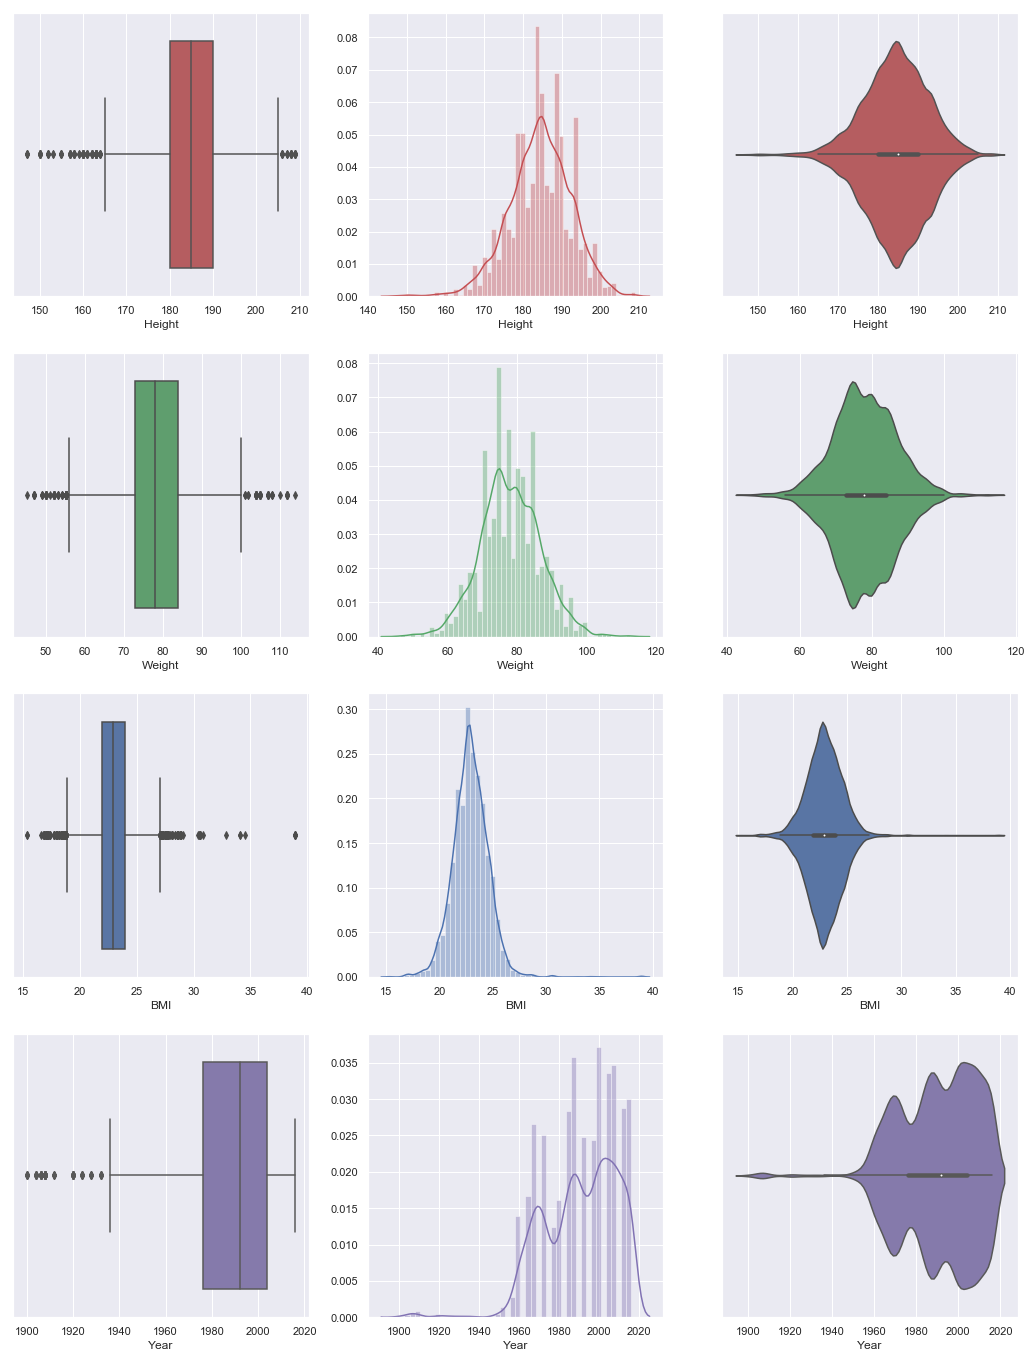

In [32]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in MswimNumVar:
    sb.boxplot(MswimNumVar[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(MswimNumVar[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(MswimNumVar[var], color = colors[count], ax = axes[count,2])
    count += 1

## Isolating Variables: Height, Weight & BMI

In [33]:
MswimHWBmi = pd.DataFrame(MswimNumVar[[ "Height", "Weight", "BMI"]])

          Height    Weight       BMI
Height  1.000000  0.766521 -0.020643
Weight  0.766521  1.000000  0.621795
BMI    -0.020643  0.621795  1.000000


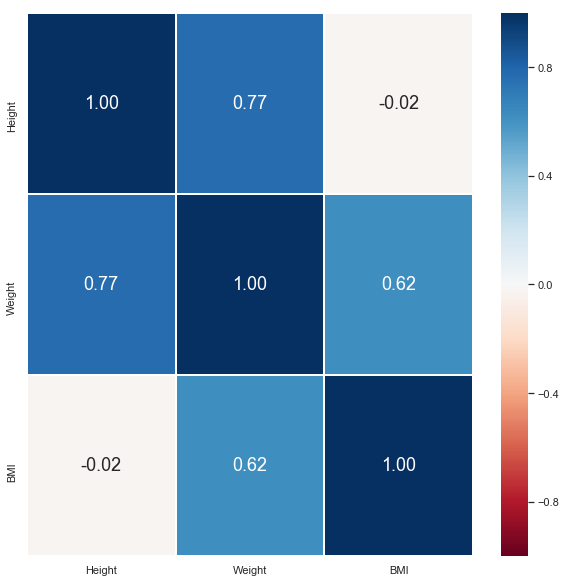

In [34]:
# Correlation Matrix
print(MswimHWBmi.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(MswimHWBmi.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

## Observing the Height, Weight, and BMI distribution of Olympic Swimmers across the years

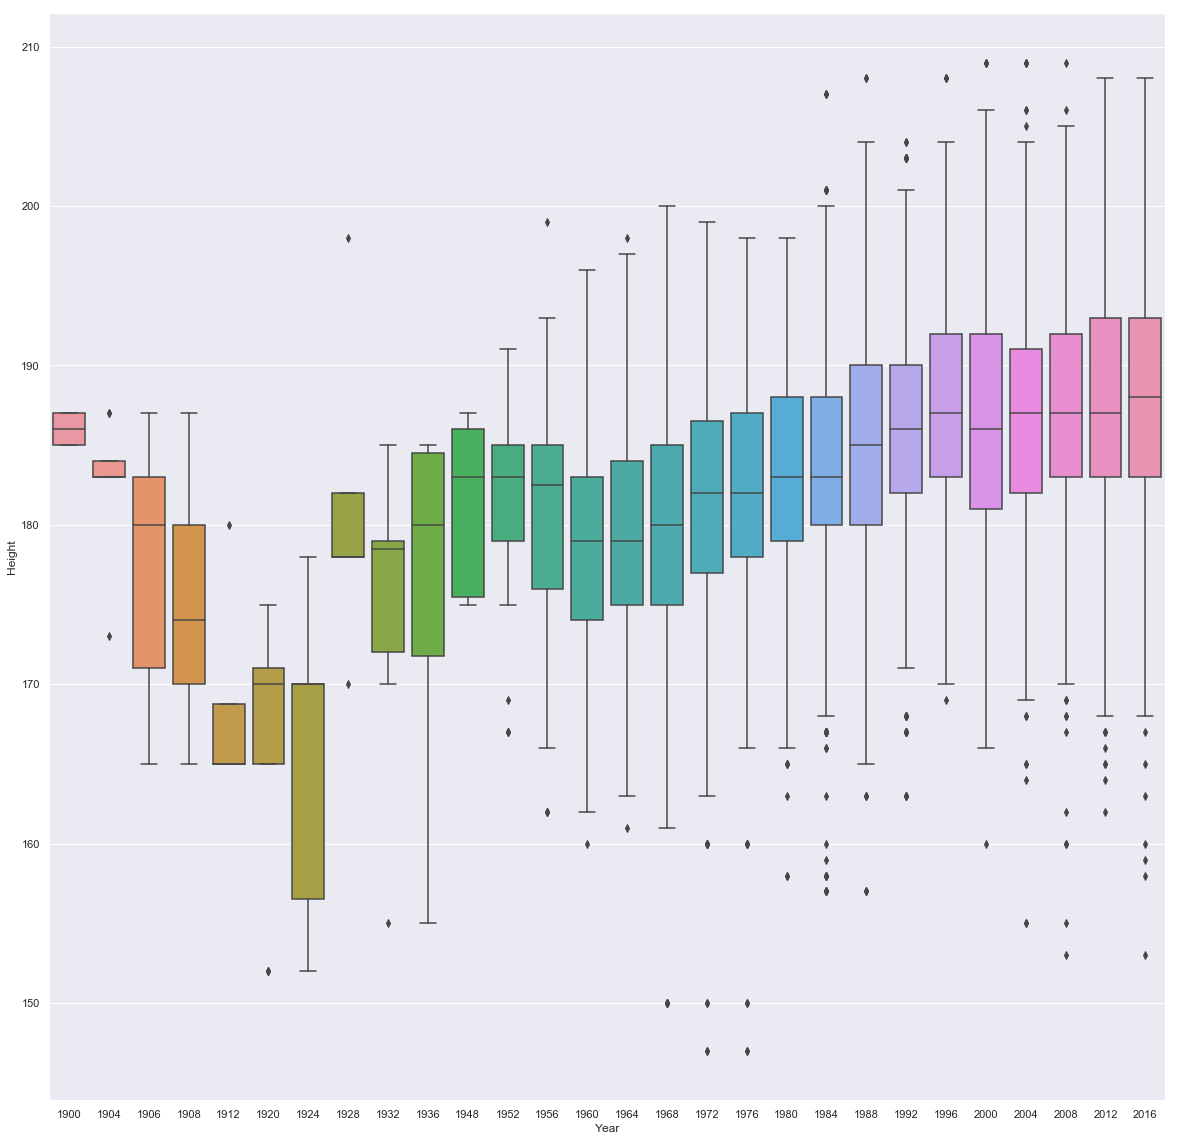

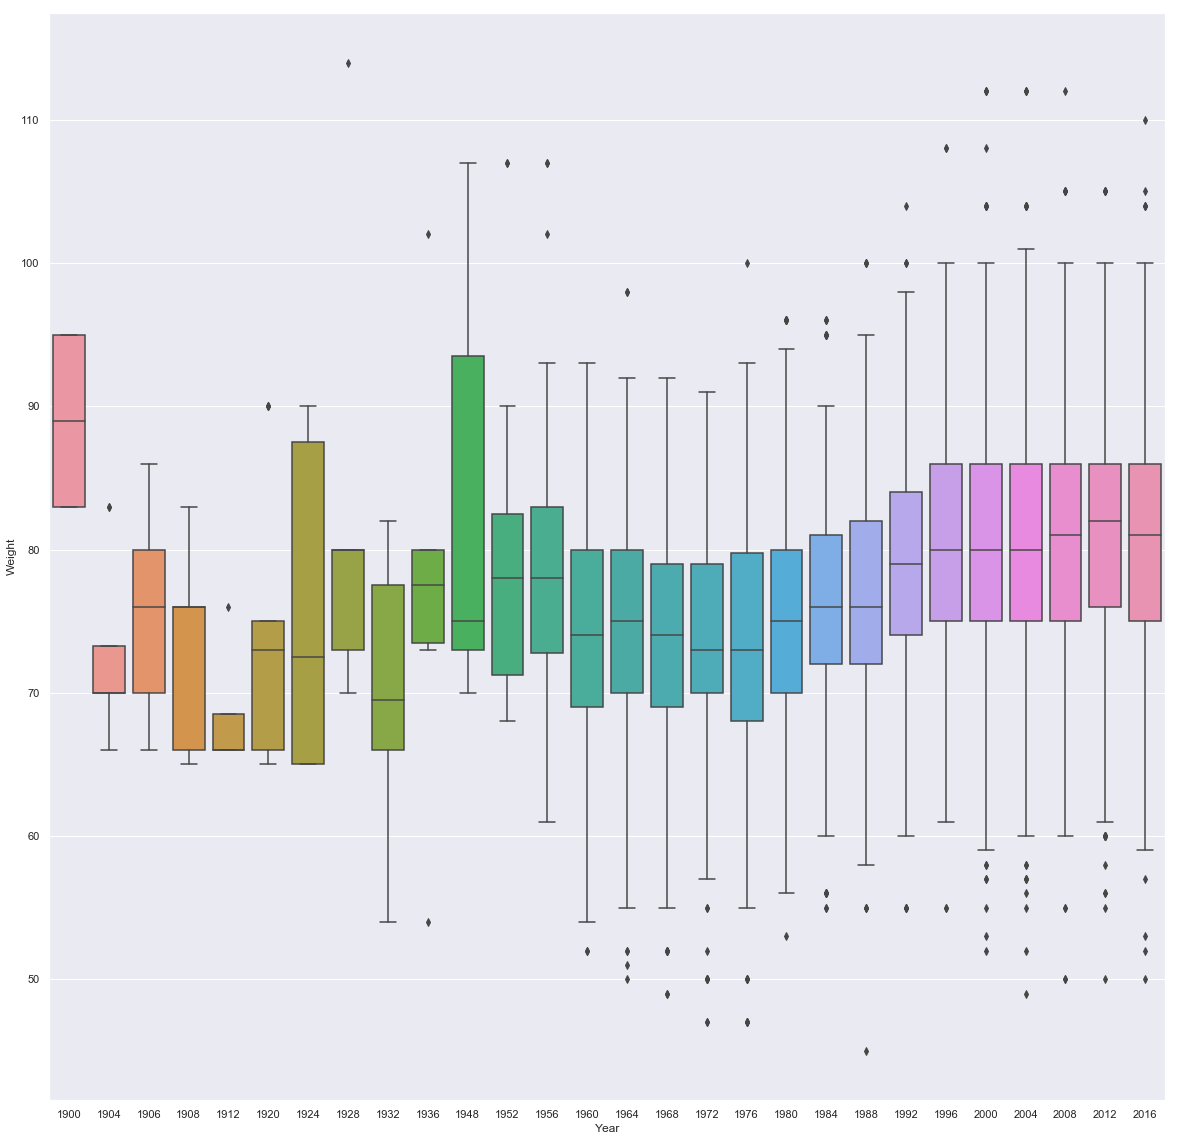

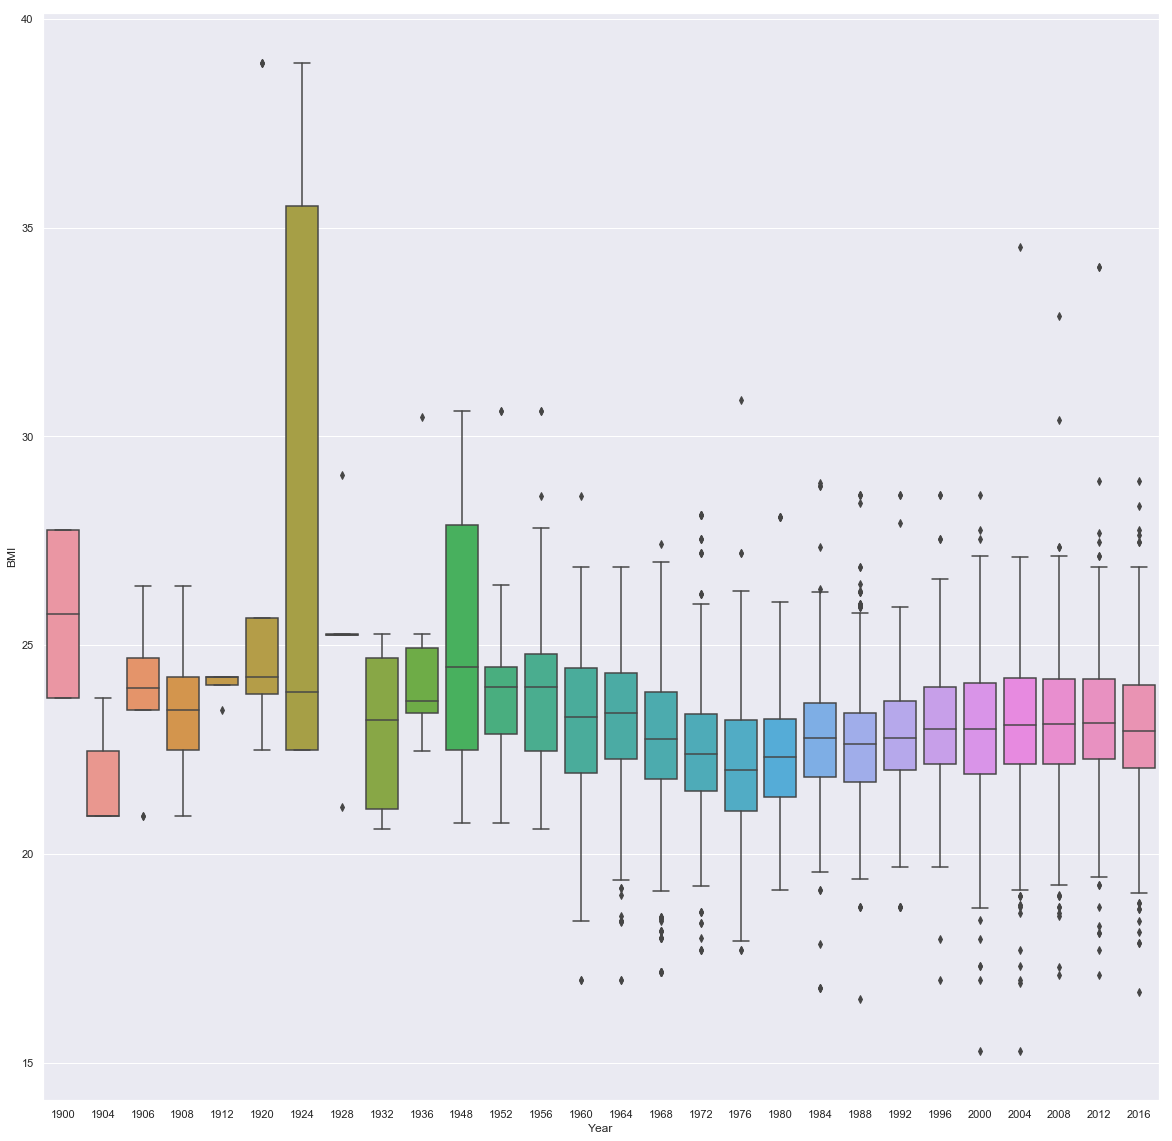

In [35]:
for var in MswimHWBmi:
    f, axes = plt.subplots(1, 1, figsize=(20, 20))
    sb.boxplot(x = MswimNumVar["Year"], y = var, data = MswimHWBmi)

## What height, weight and BMI are suited for swimmers?

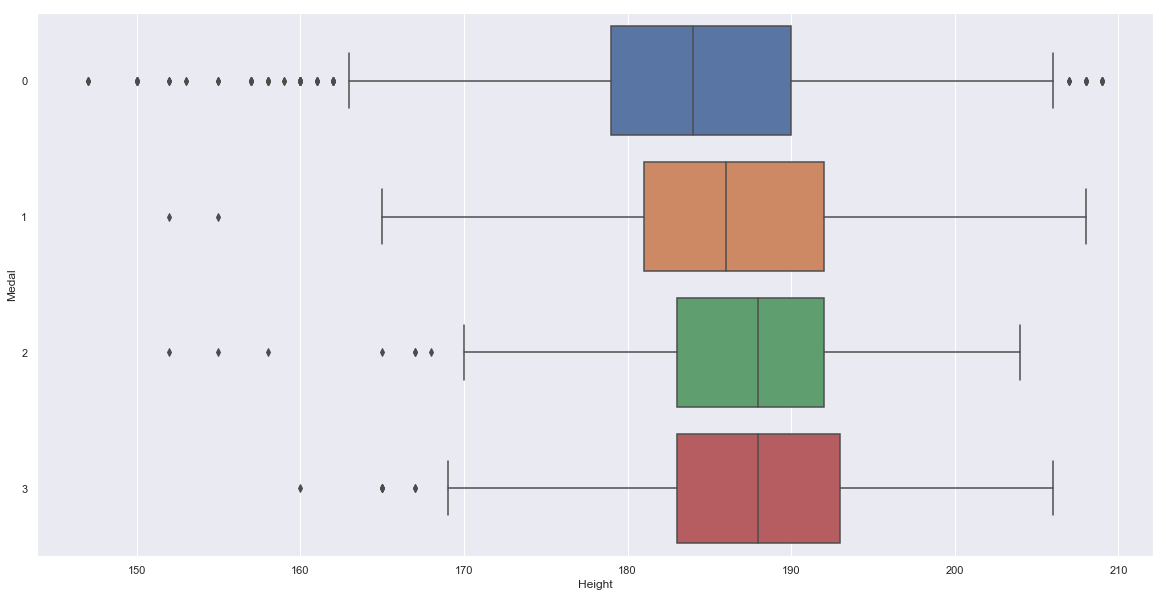

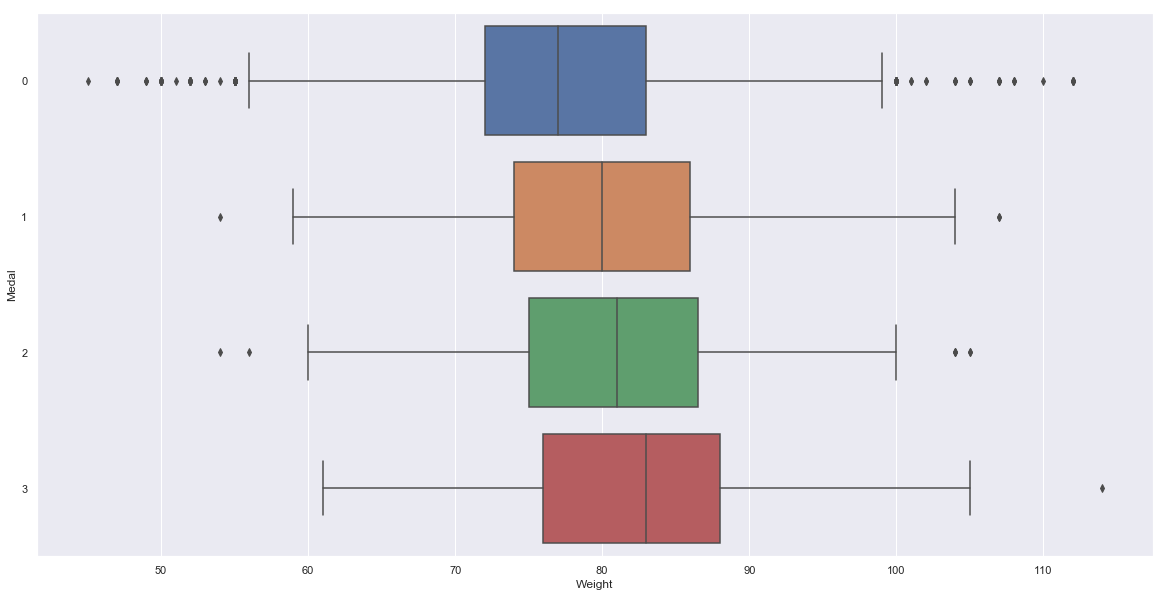

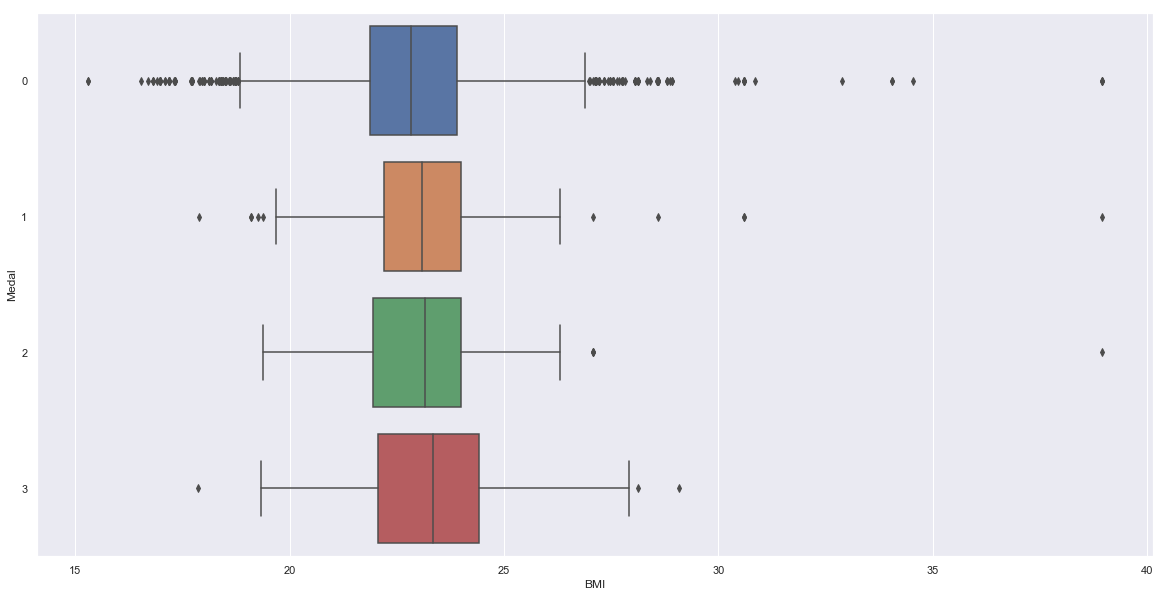

In [36]:
for var in MswimHWBmi:
    f, axes = plt.subplots(1, 1, figsize=(20, 10))
    sb.boxplot(x = var, y = MswimDataNN["Medal"], data = MswimHWBmi)

We can see that the median values of Gold Medalists and Silver Medalists are very similar. However, this boxplot does not consider what year it is.

## Yearly Distribution of Medalists Statistics

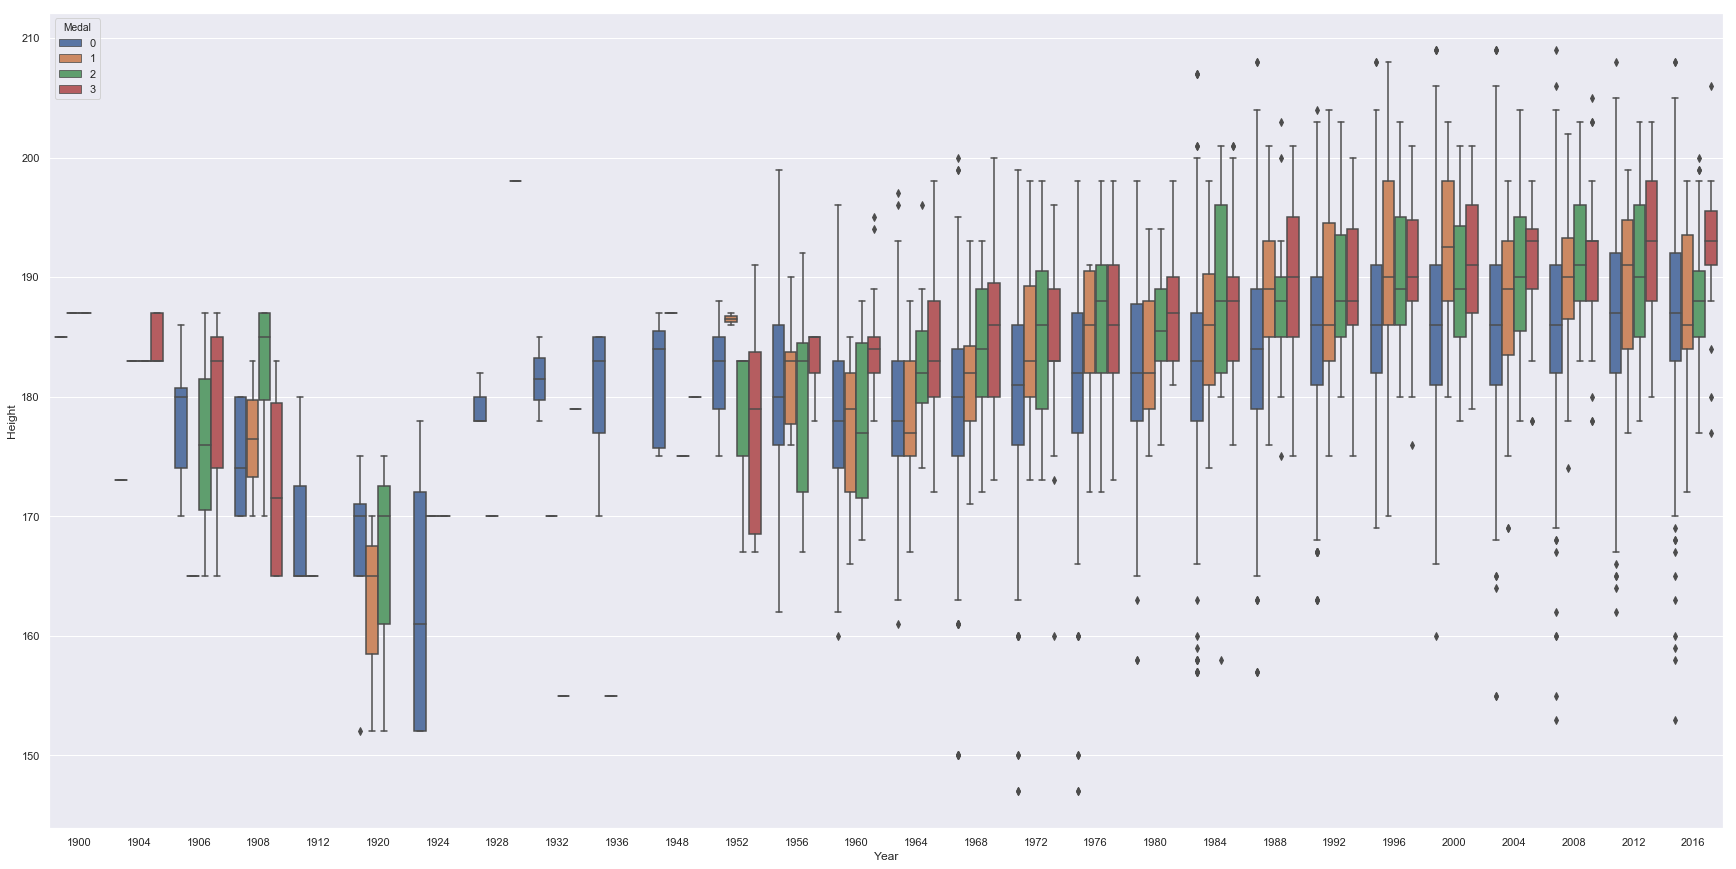

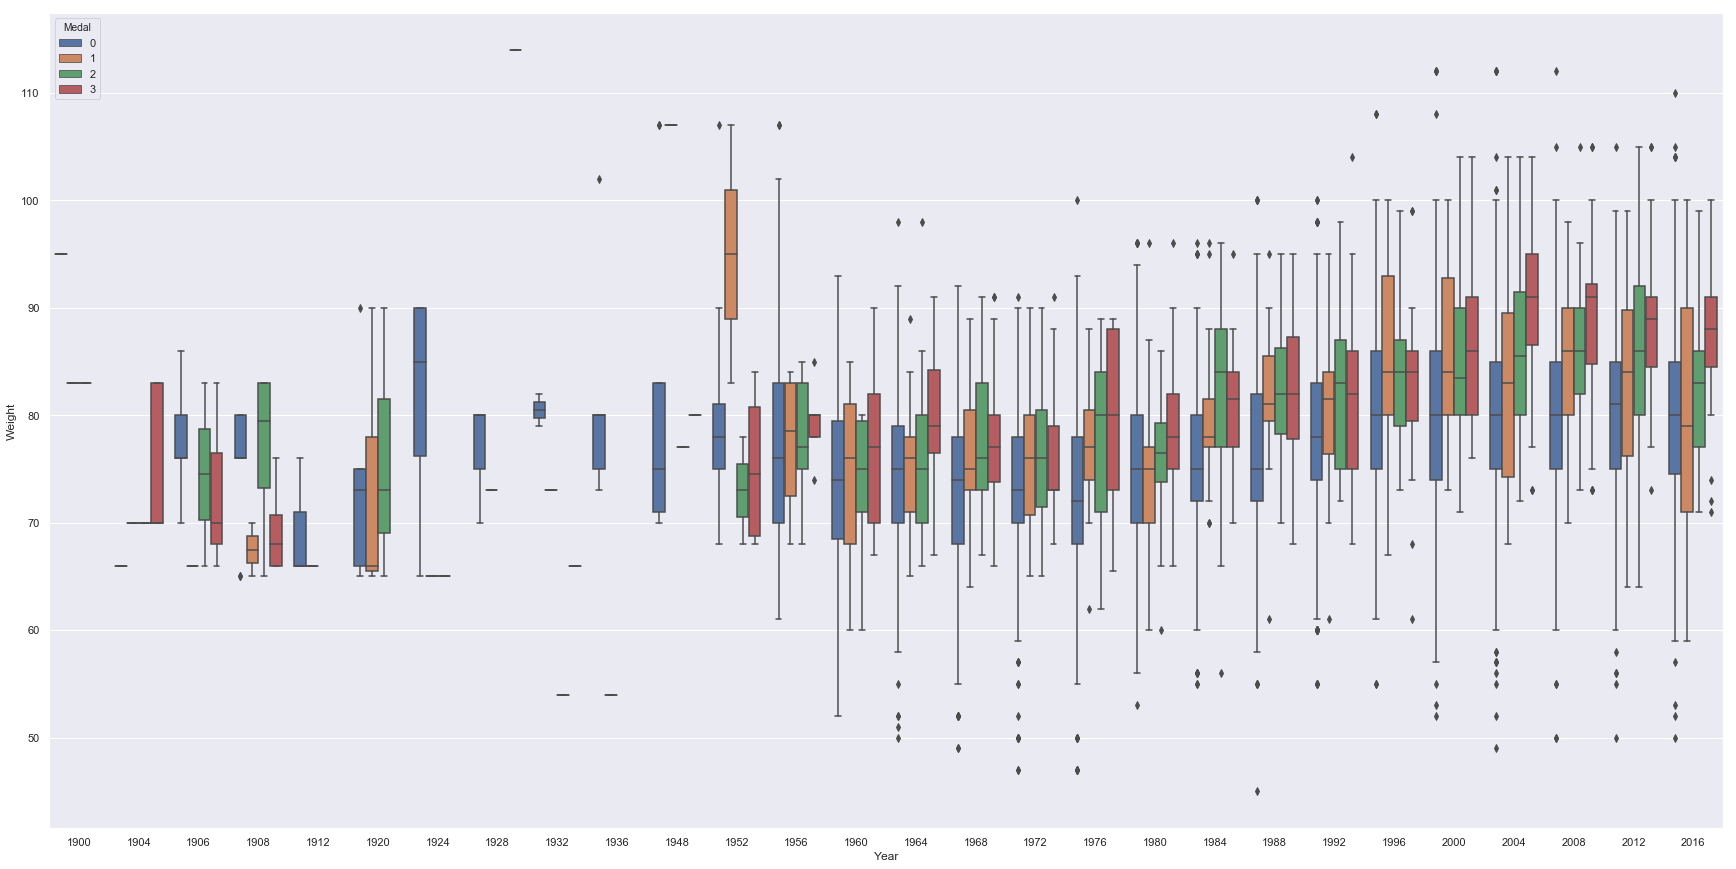

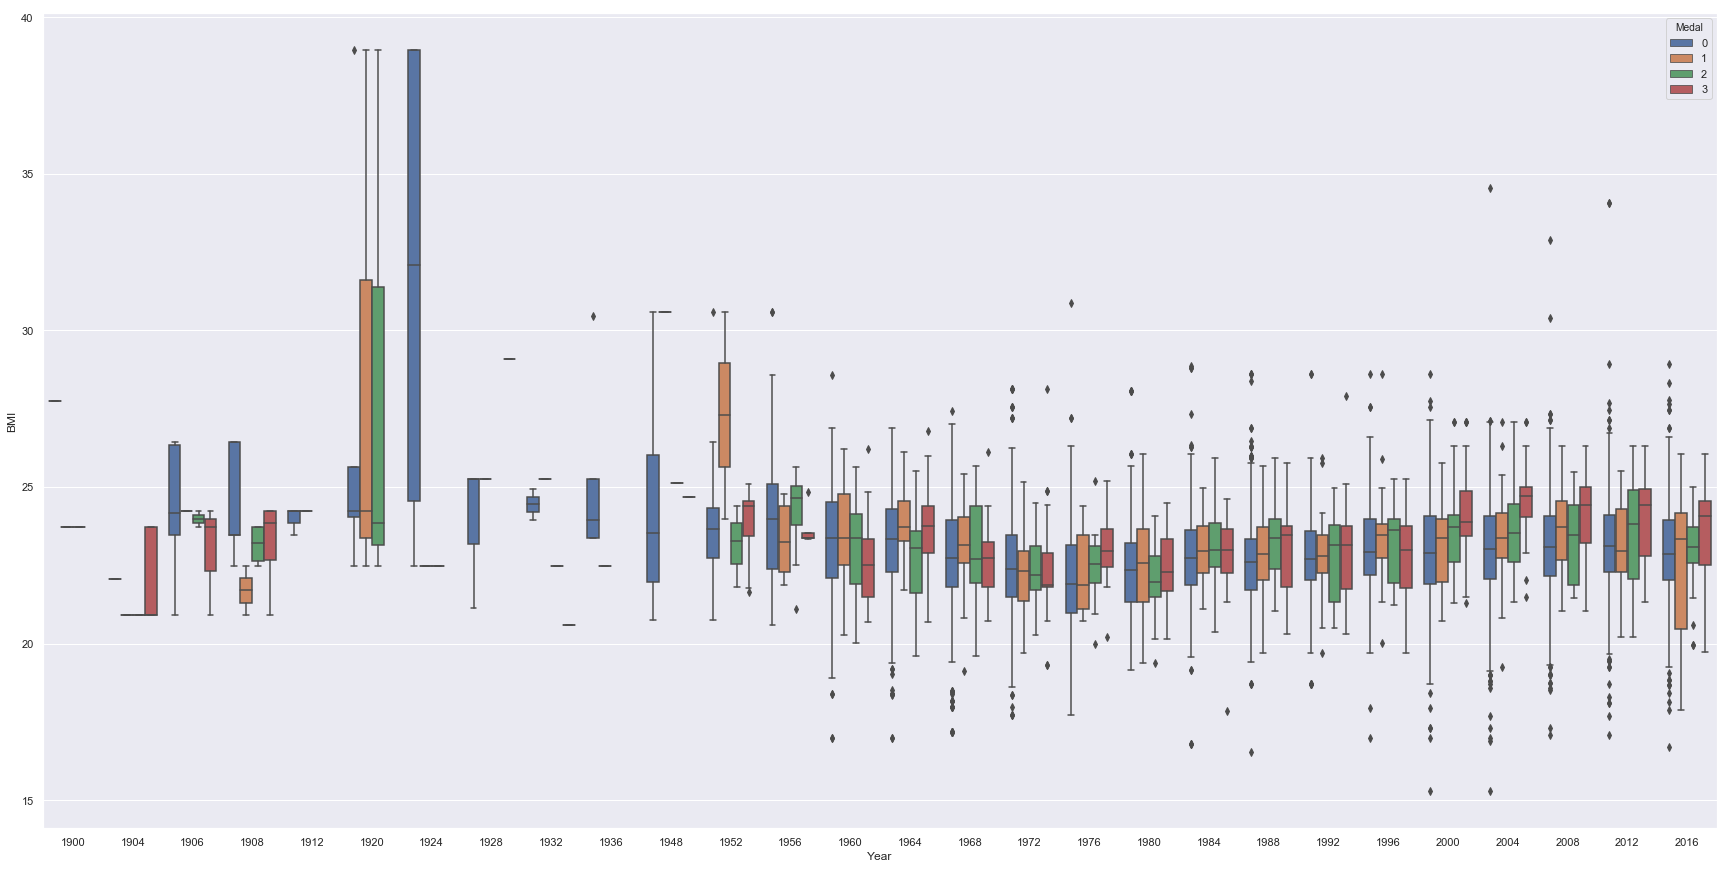

In [38]:
for var in MswimHWBmi:
    f, axes = plt.subplots(1, 1, figsize=(30, 15))
    sb.boxplot(x = MswimDataNN["Year"], y = var, hue = MswimDataNN['Medal'], data = MswimDataNN)

## Predicting Performace in Swimming?

Predicting likelihood of a medal depending on the person's Height, Weight, and BMI as well as the given year.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8721620227038184

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8773219814241486



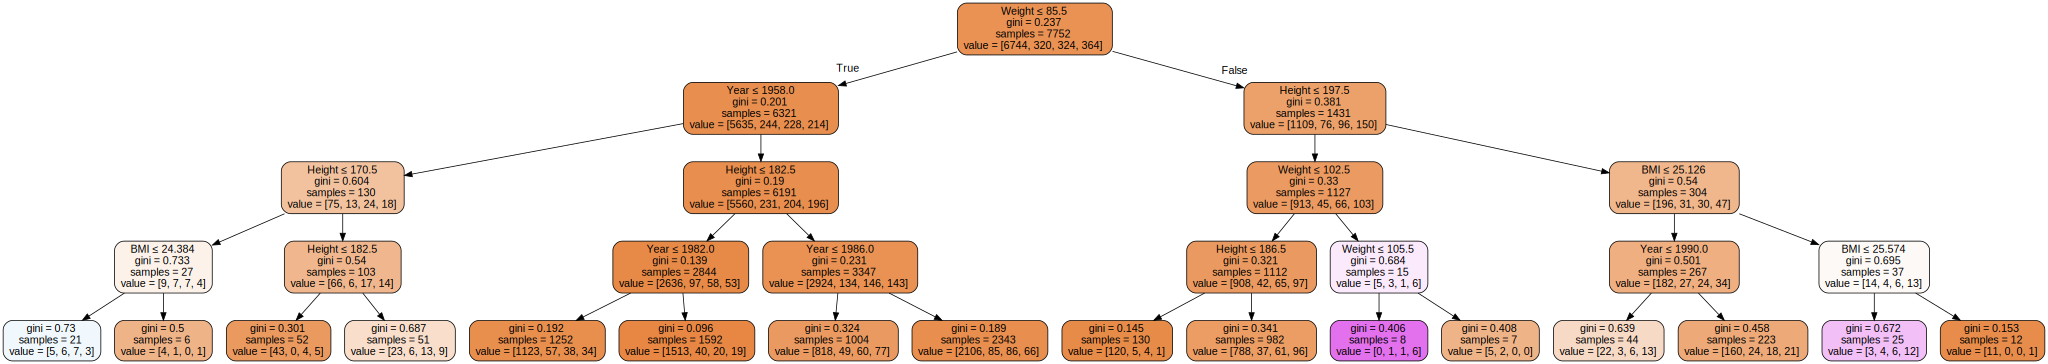

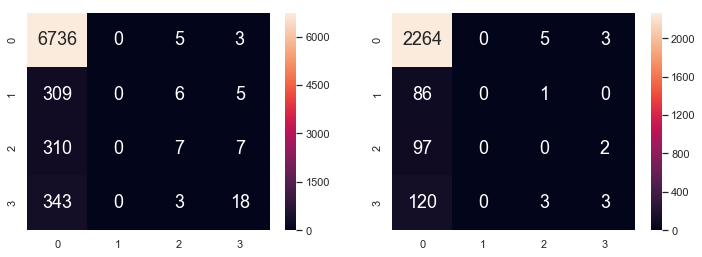

In [39]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

medal = pd.DataFrame(MswimDataNN['Medal'])   # Response
variables = pd.DataFrame(MswimDataNN[['Year', 'Height', 'Weight', 'BMI']])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(variables, medal, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

## The decision tree doesnt predict Bronze or Silver Properly
So reduce specificity, by predicting whether a person will get a medal or not rather than what type of medal the person will get

In [40]:
MswimDataNN.Medal.replace(to_replace = [0, 1, 2, 3], value = [0, 1, 1, 1], inplace = True)

C:\Users\Bruger\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8731940144478845

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8800309597523219



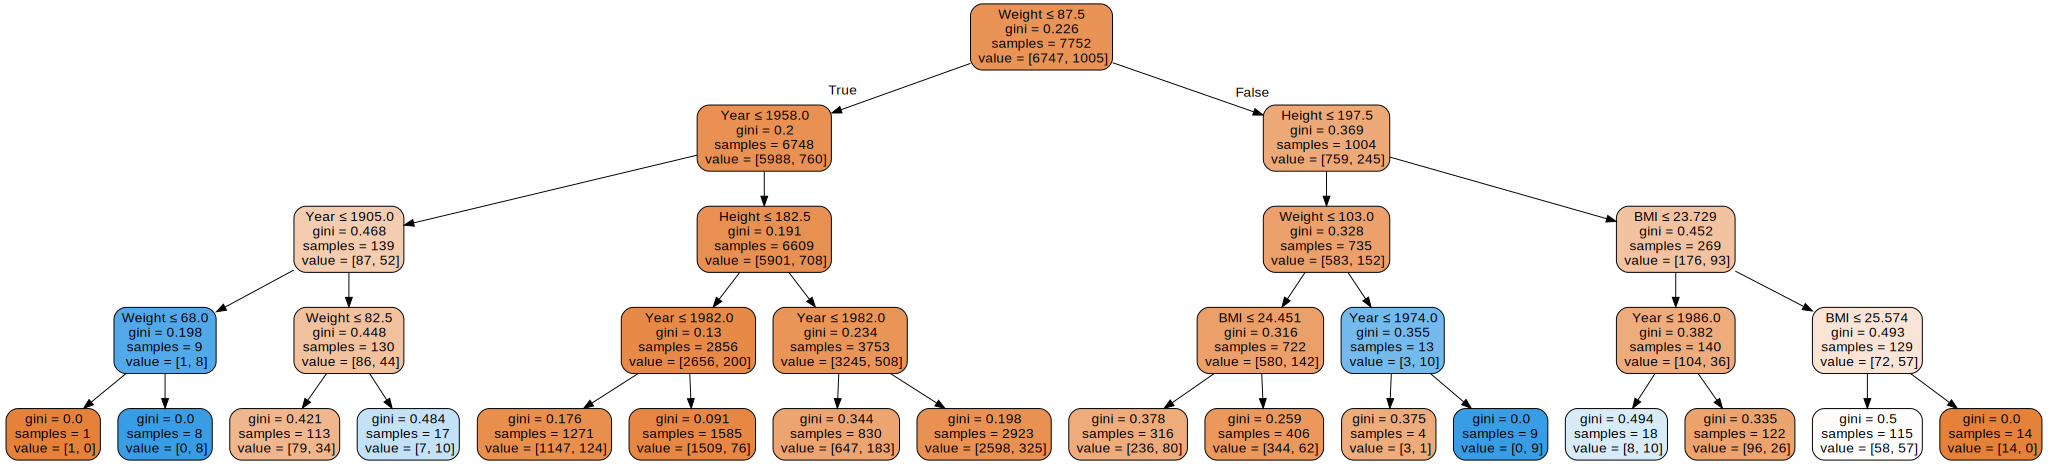

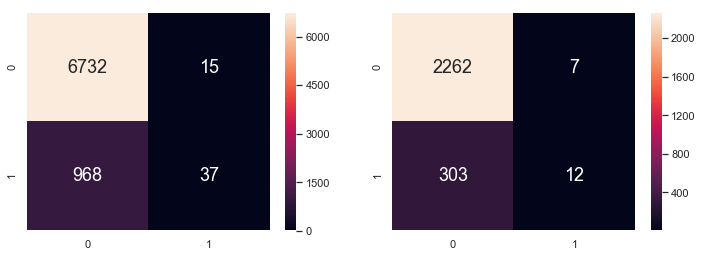

In [41]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

medal = pd.DataFrame(MswimDataNN['Medal'])   # Response
variables = pd.DataFrame(MswimDataNN[['Year', 'Height', 'Weight', 'BMI']])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(variables, medal, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

# Based on Height, Weight, Age, BMI, Sex and Year, predict the sport

In [42]:
olympicData = pd.read_csv('athlete_events.csv')
olympicData.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


## Filling the NaN values in Medal column with 'NoMedal'

In [43]:
colDrop = ['Name','Games','City'] 
olympicData.drop(columns = colDrop, inplace = True)
olympicData['Medal'] = olympicData['Medal'].fillna('NoMedal')

In [44]:
#Getting count of different sports
print(olympicData.info())
print(olympicData['Sport'].value_counts())
print(olympicData['Sport'].unique().shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 12 columns):
ID        271116 non-null int64
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     271116 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 24.8+ MB
None
Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Cross Country Skiing      9133
Alpine Skiing             8829
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing             

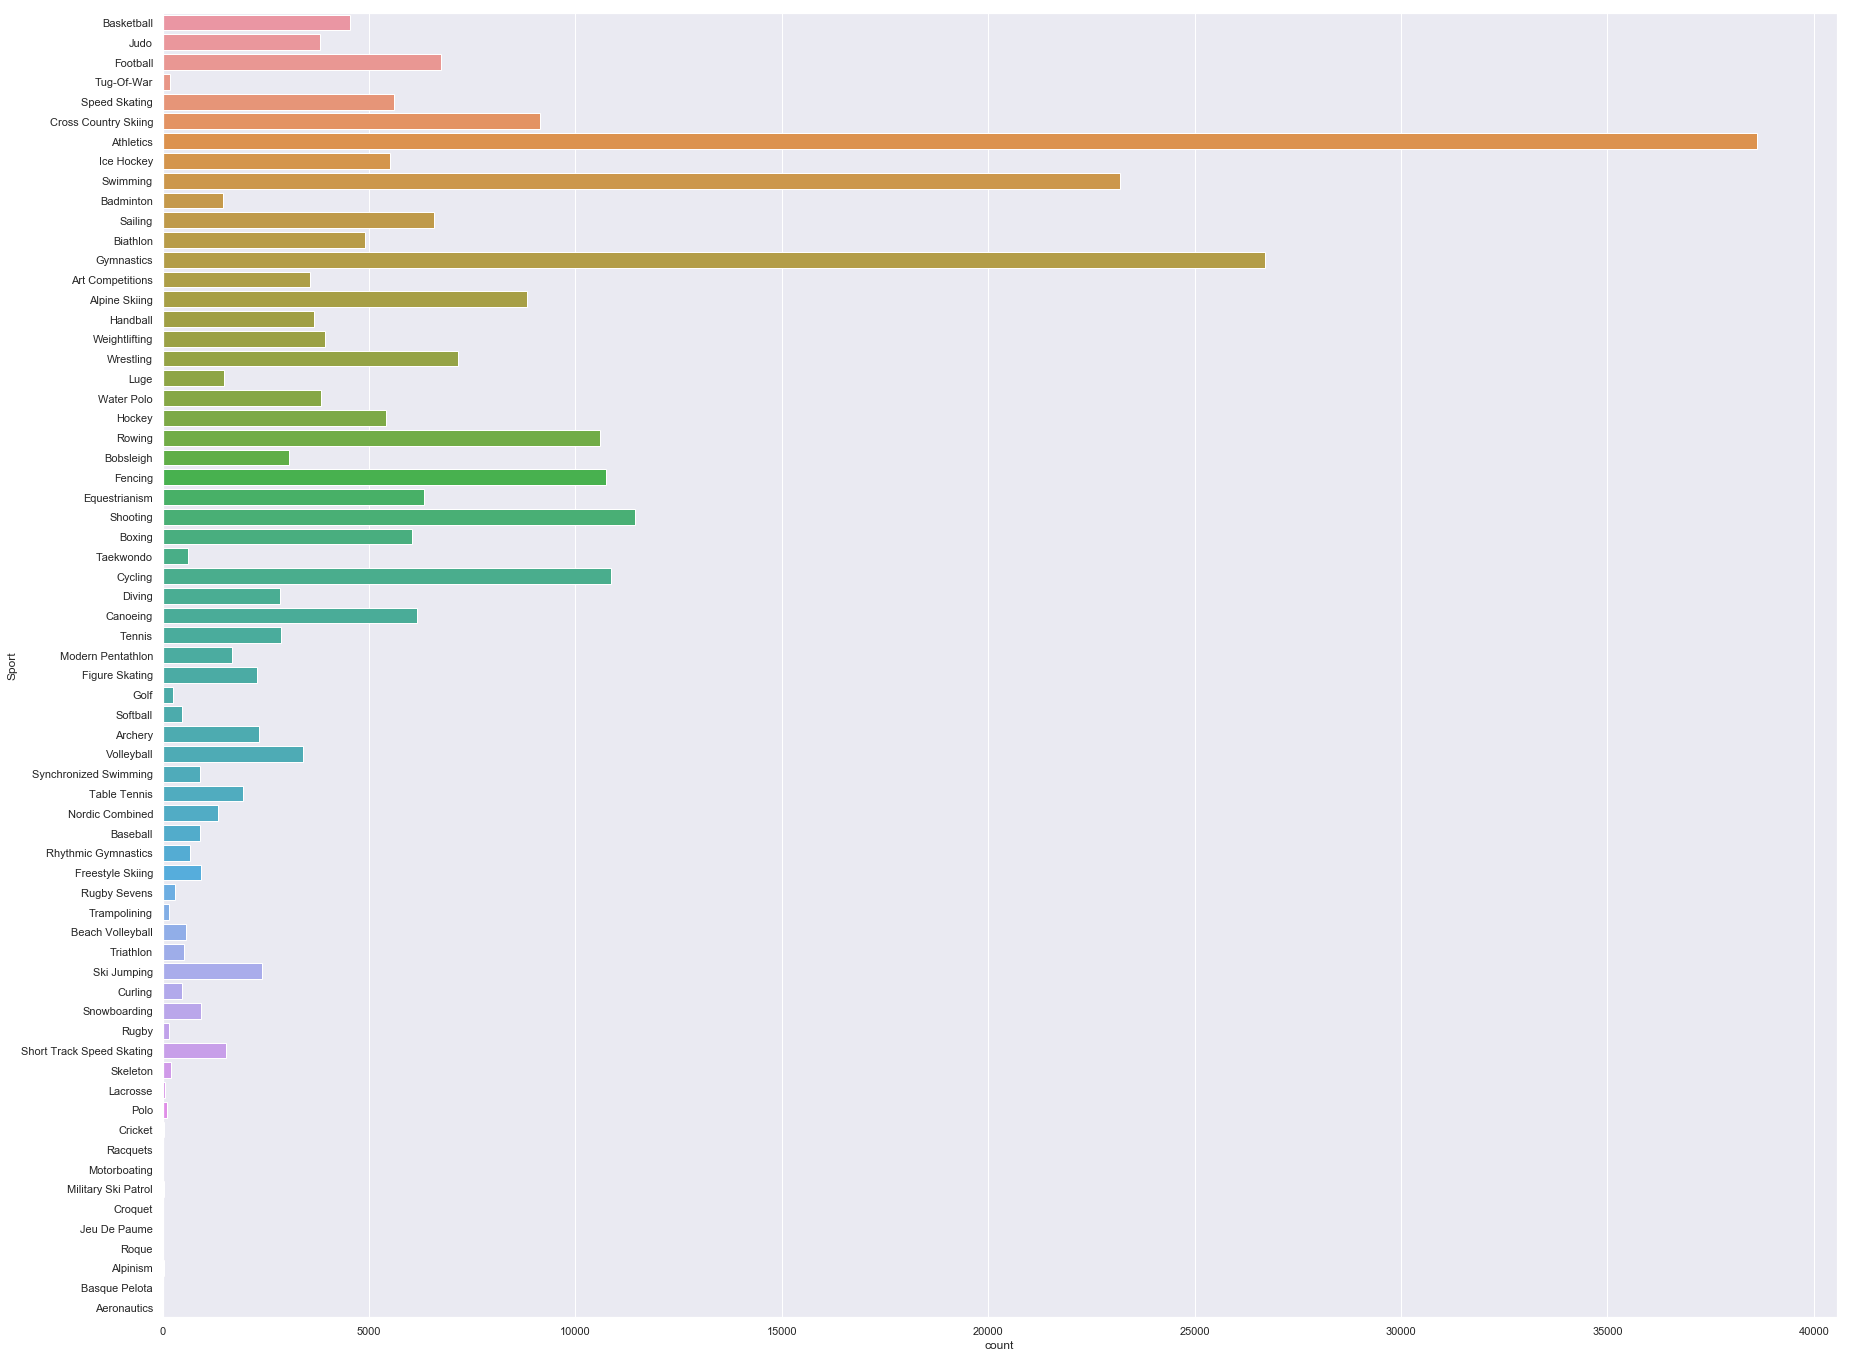

In [45]:
f, axes = plt.subplots(1, 1, figsize=(30, 24))
sb.countplot(y='Sport', data=olympicData)

## checking how data looks like for the sports that have very low counts according to countplot, finding the years for which they existed

In [46]:
sportCol = ['Cricket','Racquets','Motorboating','Military Ski Patrol','Croquet','Jeu De Paume','Roque','Alpinism',
            'Basque Pelota','Aeronautics','Rugby Sevens','Tug-Of-War','Taekwondo','Golf','Softball','Trampolining',
            'Synchronized Swimming','Baseball','Rhythmic Gymnastics','Freestyle Skiing','Beach Volleyball','Triathlon',
            'Curling','Snowboarding','Rugby','Skeleton','Lacrosse','Polo','Figure Skating','Ice Hockey','Badminton','Luge',
            'Modern Pentathlon','Archery','Table Tennis','Nordic Combined','Ski Jumping','Short Track Speed Skating',
            'Art Competitions']
print('Unique Years :')
for i in sportCol:
    yearSport = olympicData[olympicData['Sport'] == i] 
    print(i,' ',yearSport['Year'].unique())

Unique Years :
Cricket   [1900]
Racquets   [1908]
Motorboating   [1908]
Military Ski Patrol   [1924]
Croquet   [1900]
Jeu De Paume   [1908]
Roque   [1904]
Alpinism   [1924 1936 1932]
Basque Pelota   [1900]
Aeronautics   [1936]
Rugby Sevens   [2016]
Tug-Of-War   [1900 1908 1912 1906 1920 1904]
Taekwondo   [2000 2016 2008 2004 2012]
Golf   [1900 1904 2016]
Softball   [2008 2000 2004 1996]
Trampolining   [2016 2008 2000 2012 2004]
Synchronized Swimming   [2008 2012 2000 2004 2016 1992 1996 1984 1988]
Baseball   [2000 2008 1992 2004 1996]
Rhythmic Gymnastics   [2004 1996 1992 2012 2016 2000 1984 1988 2008]
Freestyle Skiing   [1992 2002 2006 2010 2014 1994 1998]
Beach Volleyball   [2008 2016 1996 2000 2012 2004]
Triathlon   [2016 2008 2012 2004 2000]
Curling   [2006 2014 1924 1998 2010 2002]
Snowboarding   [2006 2014 1998 2002 2010]
Rugby   [1900 1924 1920 1908]
Skeleton   [2002 2006 2014 1948 1928 2010]
Lacrosse   [1908 1904]
Polo   [1920 1936 1924 1900 1908]
Figure Skating   [1964 1968 20

## Removing above sports as they existed only for some years, they have low count or contain missing values in Height, Weight or Age

In [47]:
olympicData = olympicData[~olympicData['Sport'].isin(sportCol)]

In [48]:
olympicData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237046 entries, 0 to 271115
Data columns (total 12 columns):
ID        237046 non-null int64
Sex       237046 non-null object
Age       228464 non-null float64
Height    184551 non-null float64
Weight    182393 non-null float64
Team      237046 non-null object
NOC       237046 non-null object
Year      237046 non-null int64
Season    237046 non-null object
Sport     237046 non-null object
Event     237046 non-null object
Medal     237046 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 23.5+ MB


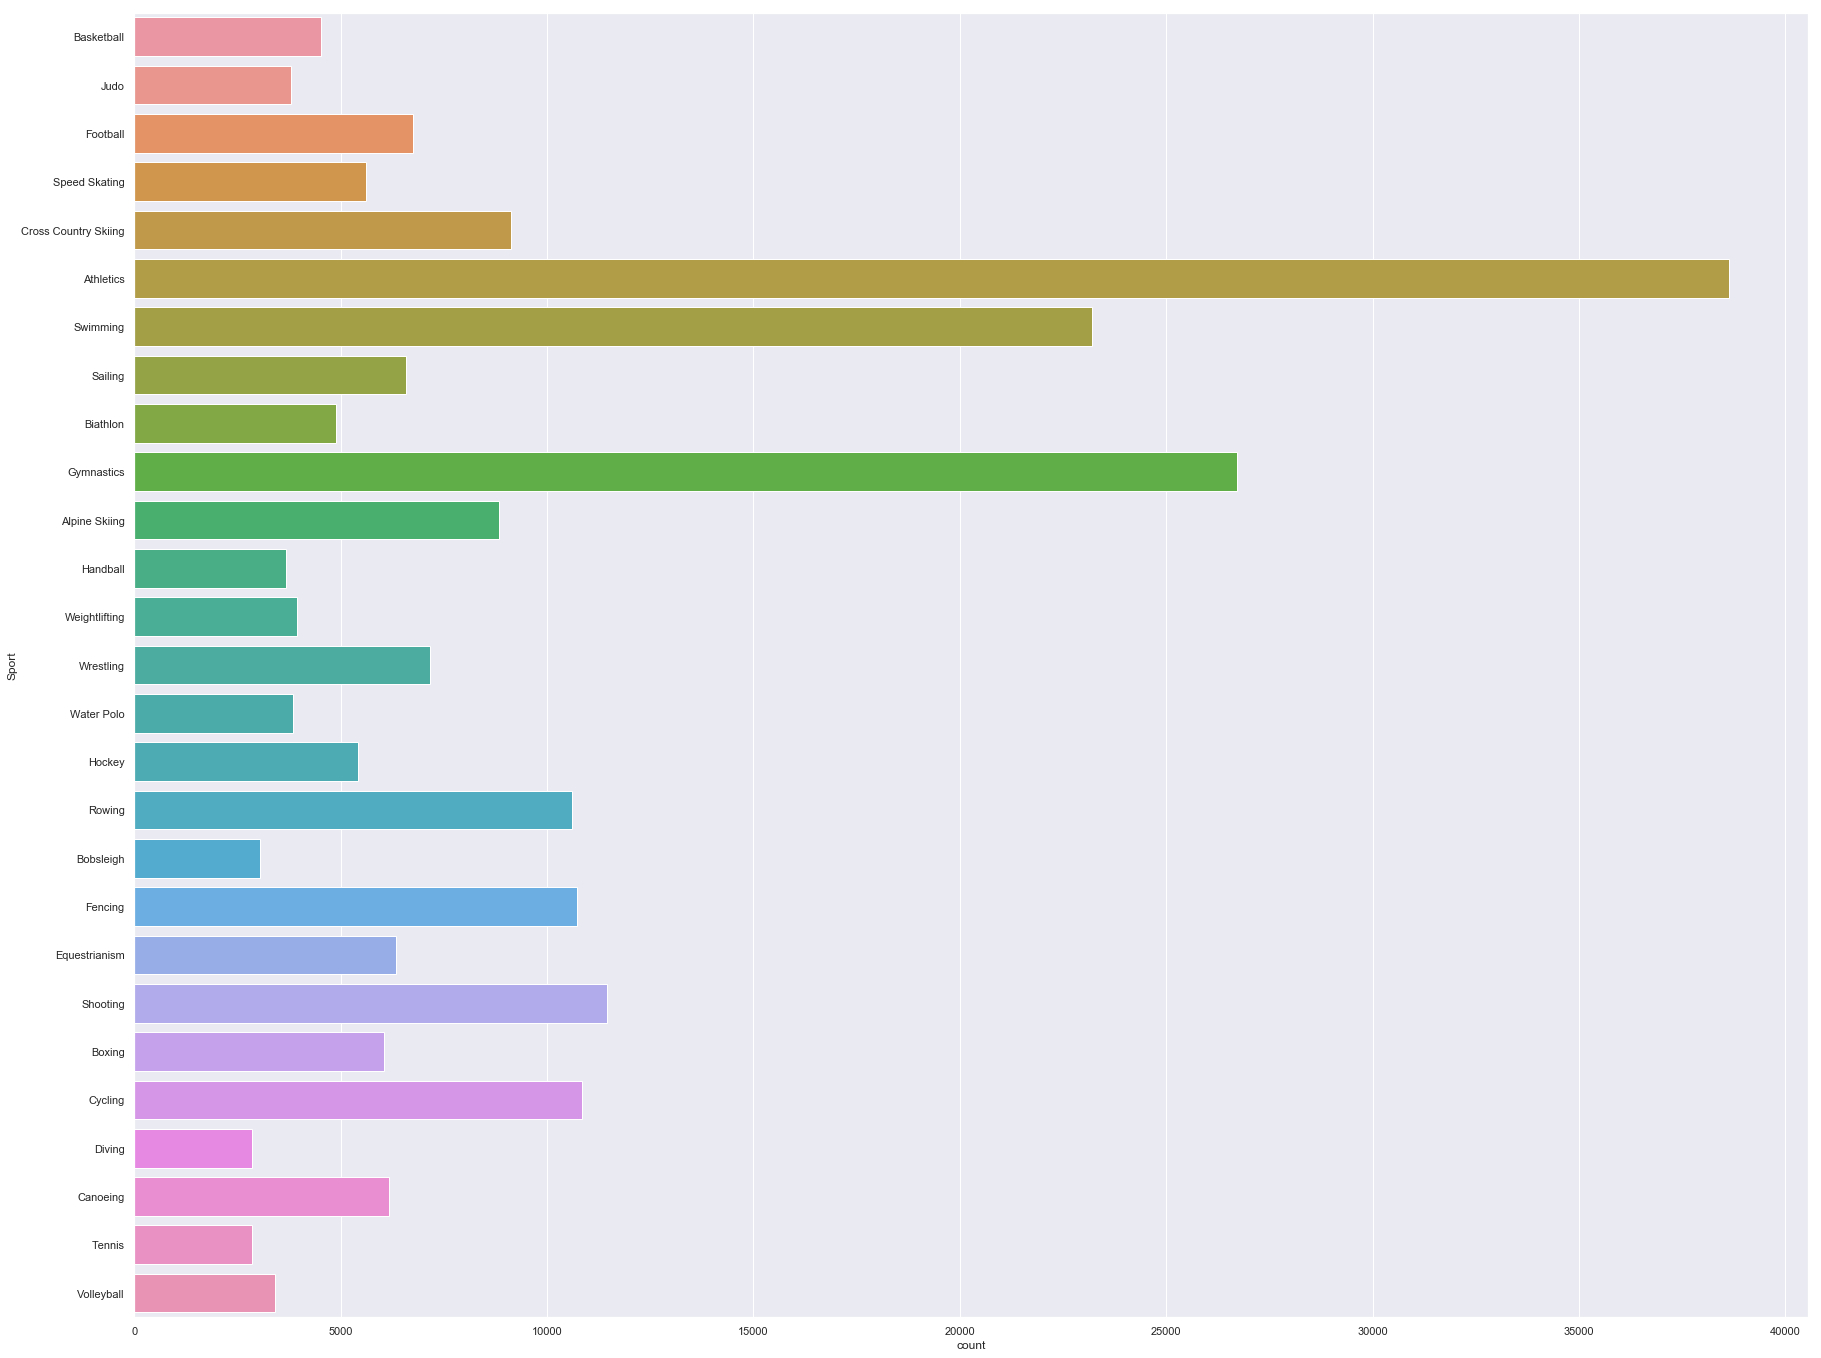

In [49]:
f, axes = plt.subplots(1, 1, figsize=(30, 24))
sb.countplot(y='Sport', data=olympicData)

## Filling the NaN Height, Weight, Age with mean for every country and sex

In [50]:
#Making a new DF with only these columns
CalcMean = olympicData[['Height', 'Weight','Age','NOC','Sex']]
#Finding out mean height, weight and age for each NOC + Sex combination
AvgData = CalcMean.groupby(['NOC', 'Sex']).mean().round(0)
#Renaming the columns, so it is easier to understand their meanings later
AvgData.rename(columns={'Height': 'AvgHeight', 'Weight': 'AvgWeight', 'Age':'AvgAge'}, inplace=True)
AvgData.head()

AvgHeight  AvgWeight  AvgAge
NOC Sex                              
AFG F        170.0       58.0    20.0
    M        169.0       67.0    24.0
AHO F        170.0       59.0    26.0
    M        178.0       79.0    27.0
ALB F        165.0       57.0    27.0

In [51]:
olympicData.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
0,1,M,24.0,180.0,80.0,China,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NoMedal
1,2,M,23.0,170.0,60.0,China,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NoMedal
2,3,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Football,Football Men's Football,NoMedal
4,5,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NoMedal
5,5,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NoMedal


## So, we notice that ID 3 has missing Height and Weight values, this will be used for verification later

In [52]:
# merging main DF with the average data DF to get the average values as separate columns
olympicData = pd.merge(olympicData, AvgData, on = ['NOC','Sex'])

In [53]:
#Assigning average values to missing values
olympicData['Height'] = olympicData['Height'].fillna(olympicData['AvgHeight'])
olympicData['Weight'] = olympicData['Weight'].fillna(olympicData['AvgWeight'])
olympicData['Age'] = olympicData['Age'].fillna(olympicData['AvgAge'])

In [54]:
#sort by id and verify
olympicData.sort_values(['ID']).head()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal,AvgHeight,AvgWeight,AvgAge
0,1,M,24.0,180.0,80.0,China,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NoMedal,178.0,73.0,24.0
1,2,M,23.0,170.0,60.0,China,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NoMedal,178.0,73.0,24.0
2015,3,M,24.0,181.0,78.0,Denmark,DEN,1920,Summer,Football,Football Men's Football,NoMedal,181.0,78.0,27.0
4648,5,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NoMedal,173.0,64.0,24.0
4649,5,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NoMedal,173.0,64.0,24.0


In [55]:
olympicData['Height'] = olympicData['Height']/100 #converting height into metres

In [56]:
olympicData['BMI'] = olympicData['Weight']/(olympicData['Height']** 2).round(2) #calculating BMI

## now we can remove the NaN values as their count is very low

In [57]:
#they are not needed any more
olympicData.drop(columns=['AvgHeight', 'AvgWeight','AvgAge'], inplace = True)
#Before removing missing values
olympicData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237046 entries, 0 to 237045
Data columns (total 13 columns):
ID        237046 non-null int64
Sex       237046 non-null object
Age       237035 non-null float64
Height    236940 non-null float64
Weight    236792 non-null float64
Team      237046 non-null object
NOC       237046 non-null object
Year      237046 non-null int64
Season    237046 non-null object
Sport     237046 non-null object
Event     237046 non-null object
Medal     237046 non-null object
BMI       236790 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 25.3+ MB


In [58]:
olympicData.dropna(inplace = True)
#After removing missing values
olympicData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236790 entries, 0 to 237043
Data columns (total 13 columns):
ID        236790 non-null int64
Sex       236790 non-null object
Age       236790 non-null float64
Height    236790 non-null float64
Weight    236790 non-null float64
Team      236790 non-null object
NOC       236790 non-null object
Year      236790 non-null int64
Season    236790 non-null object
Sport     236790 non-null object
Event     236790 non-null object
Medal     236790 non-null object
BMI       236790 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 25.3+ MB


In [59]:
#Converting Sex into numeric values, so it can be used as a predictor
Sex = {'Sex' : {'M':0, 'F':1}} 
olympicData.replace(Sex, inplace=True)
olympicData.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal,BMI
0,1,0,24.0,1.80,80.0,China,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NoMedal,24.691358
1,2,0,23.0,1.70,60.0,China,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NoMedal,20.761246
2,602,0,22.0,1.82,75.0,China,CHN,2000,Summer,Boxing,Boxing Men's Middleweight,NoMedal,22.658610
3,1463,0,25.0,1.60,62.0,China,CHN,2004,Summer,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NoMedal,24.218750
4,3605,0,22.0,1.78,72.0,China,CHN,2006,Winter,Speed Skating,Speed Skating Men's 500 metres,NoMedal,22.712934


In [60]:
summerOlympics = olympicData[olympicData['Season'] == 'Summer']
winterOlympics = olympicData[olympicData['Season'] == 'Winter']

In [61]:
summerOlympics['Sport'].unique().size

22

In [62]:
winterOlympics['Sport'].unique().size

5

In [63]:
#Let us see how many different sports we have
olympicData['Sport'].unique().size

27

In [64]:
summerOlympics['Sport'].value_counts()

Athletics        38568
Gymnastics       26652
Swimming         23192
Shooting         11439
Cycling          10848
Fencing          10669
Rowing           10587
Wrestling         7141
Football          6745
Sailing           6586
Equestrianism     6344
Canoeing          6167
Boxing            6044
Hockey            5417
Basketball        4536
Weightlifting     3937
Water Polo        3846
Judo              3801
Handball          3665
Volleyball        3404
Diving            2842
Tennis            2834
Name: Sport, dtype: int64

In [65]:
winterOlympics['Sport'].value_counts()

Cross Country Skiing    9133
Alpine Skiing           8829
Speed Skating           5613
Biathlon                4893
Bobsleigh               3058
Name: Sport, dtype: int64

In [66]:
#Extract response and predictors for Winter olympics
predictors = ['Height','Weight','Age','Sex','Year','BMI']
#predictors = ['Height','Weight','Sex','BMI']
yW = pd.DataFrame(winterOlympics['Sport'].astype('category'))
XW = pd.DataFrame(winterOlympics[predictors]) 

In [67]:
# Split the Datasets into Train and Test
XW_train, XW_test, yW_train, yW_test = train_test_split(XW, yW, test_size = 0.25)

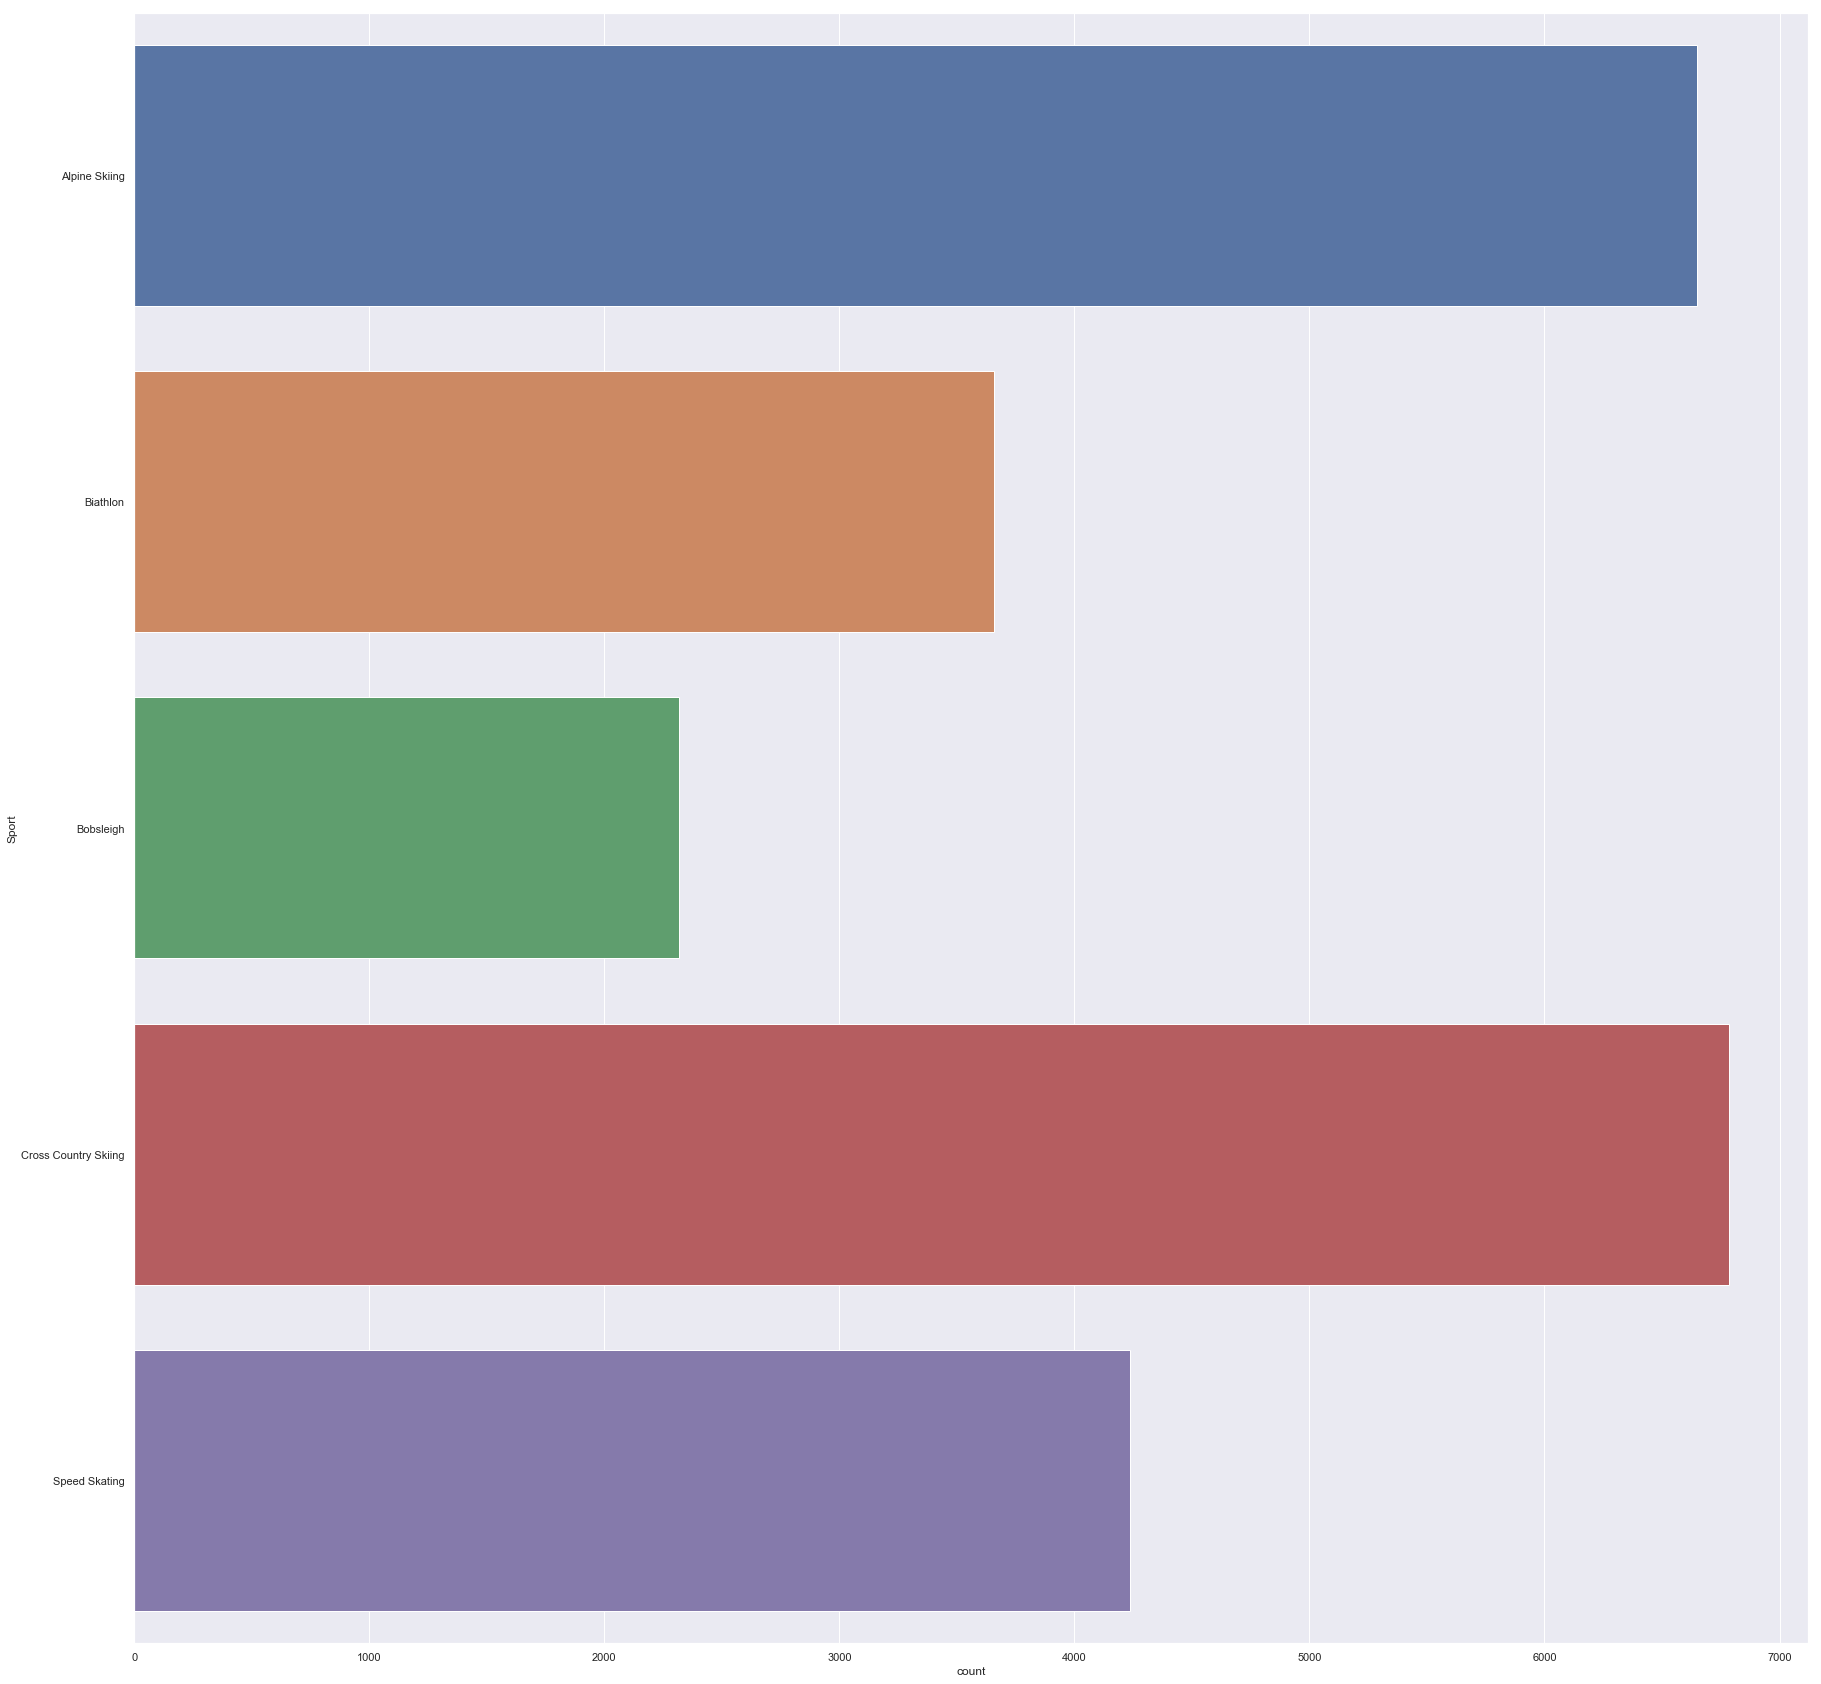

In [68]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 1, figsize=(30, 30))
sb.countplot(y = yW_train['Sport'])

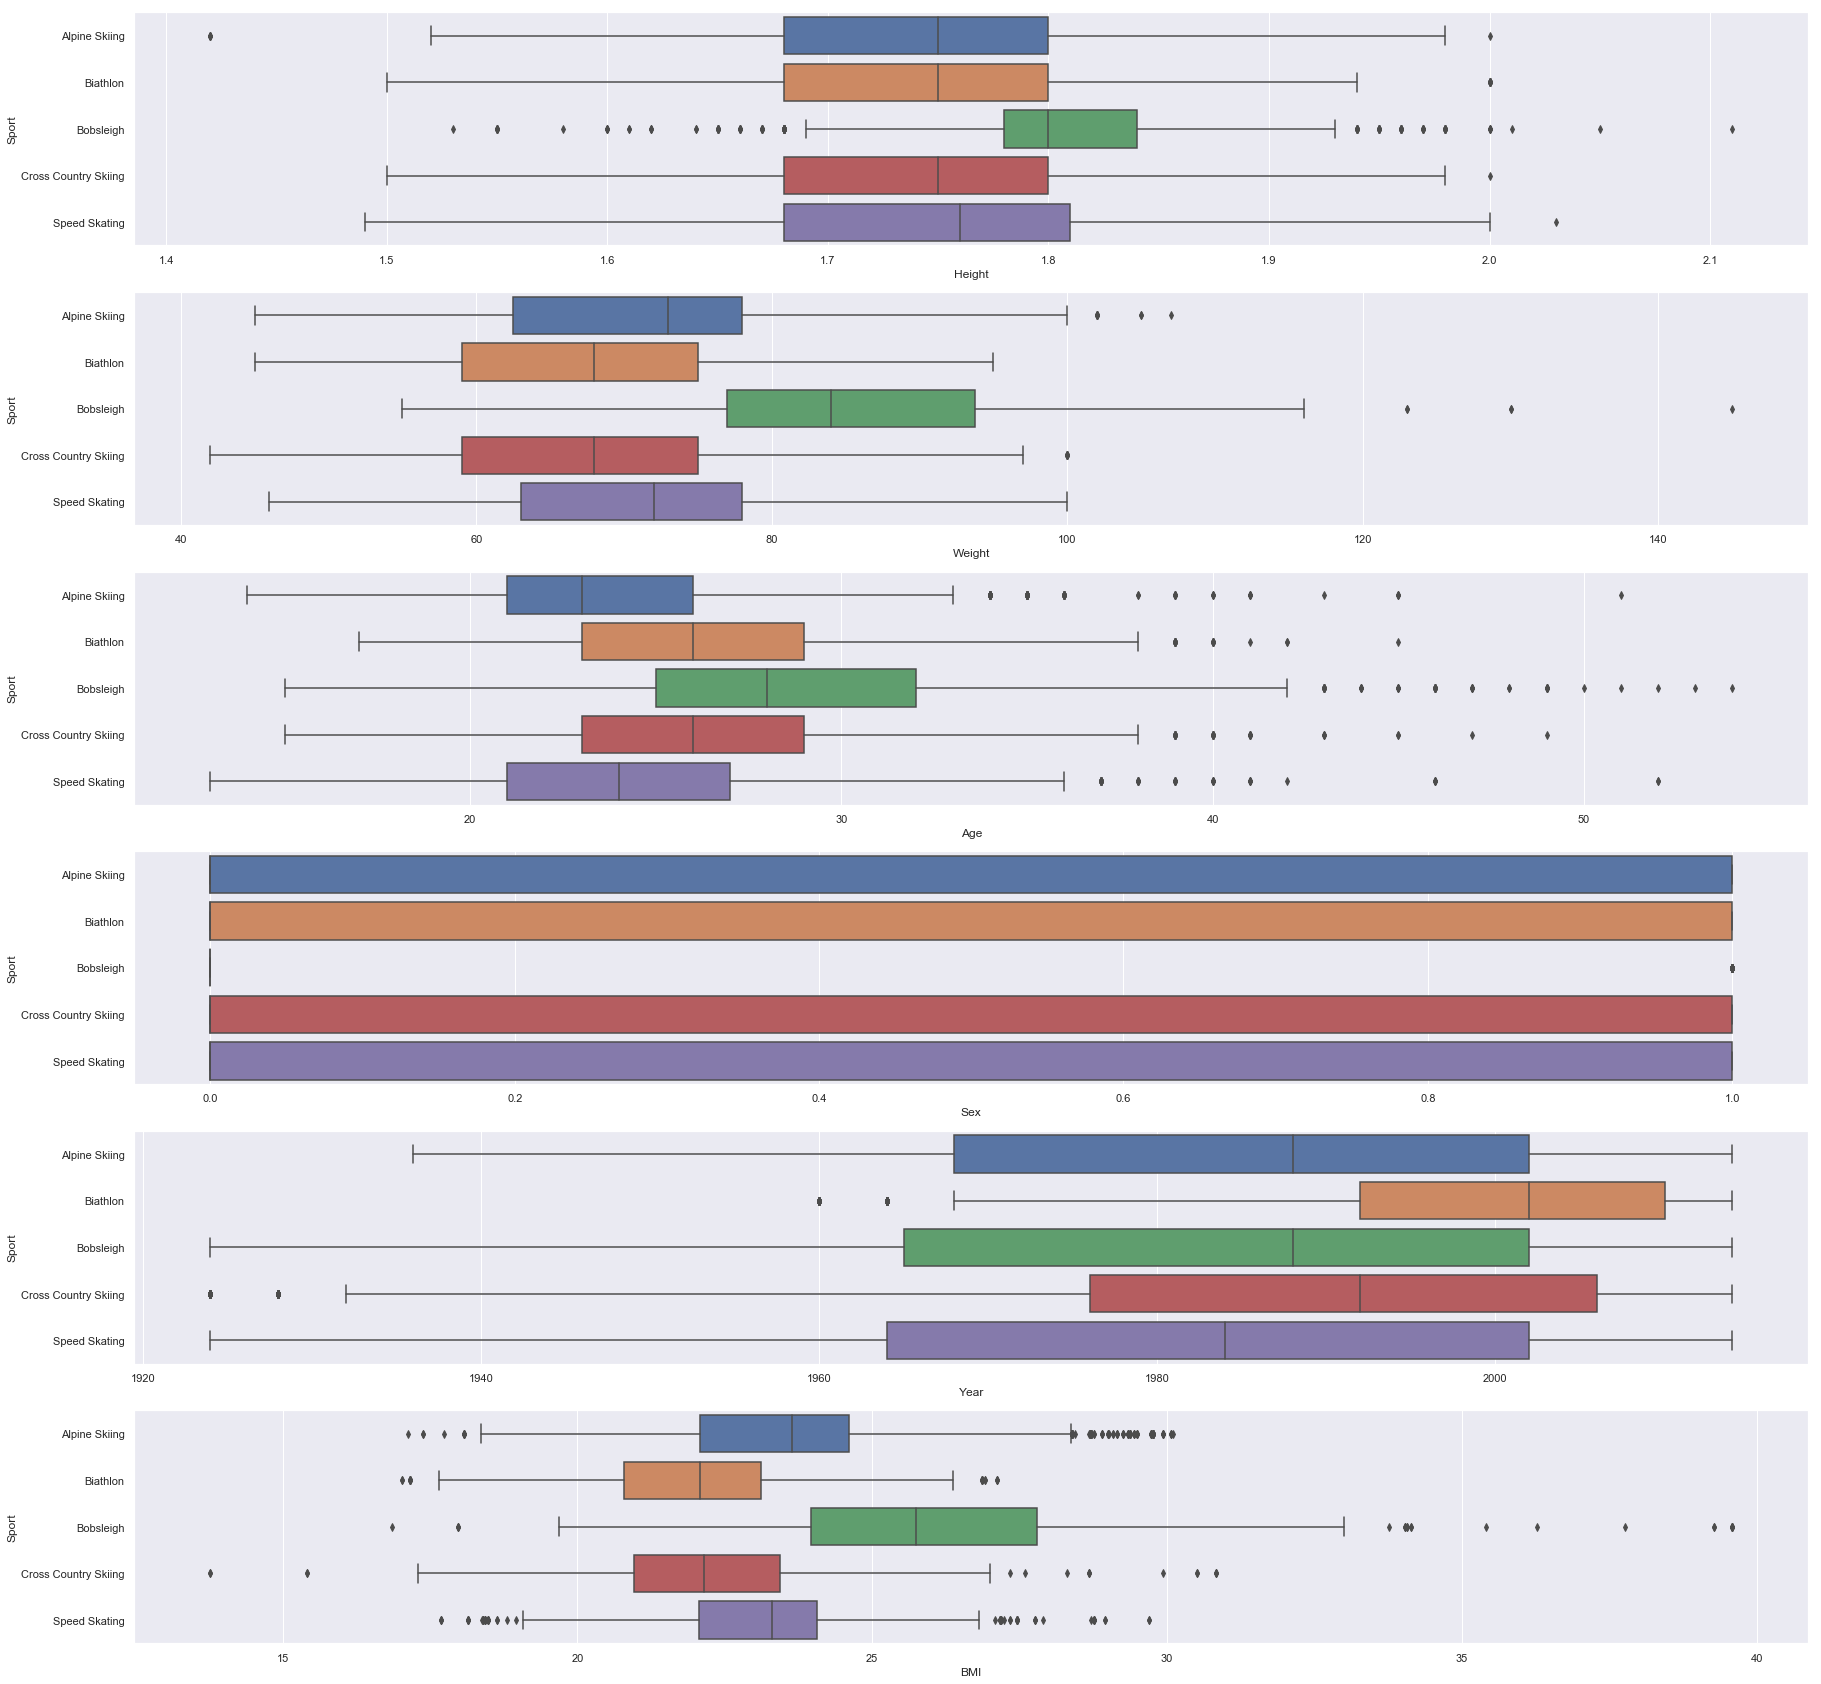

In [69]:
# Relationship between Response and the Predictors
trainDF = pd.concat([yW_train, XW_train], axis = 1, join_axes = [yW_train.index])

f, axes = plt.subplots(6, 1, figsize=(30, 30))

count = 0
for var in XW_train:
    sb.boxplot(x = var, y = 'Sport', data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [70]:
# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 5,class_weight="balanced")  # create the object
rforest.fit(XW_train, yW_train.values.ravel())                                        # train the model

# Predict Response corresponding to Predictors
yW_train_pred = rforest.predict(XW_train)
yW_test_pred = rforest.predict(XW_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4282270343427508

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.41563055062166965



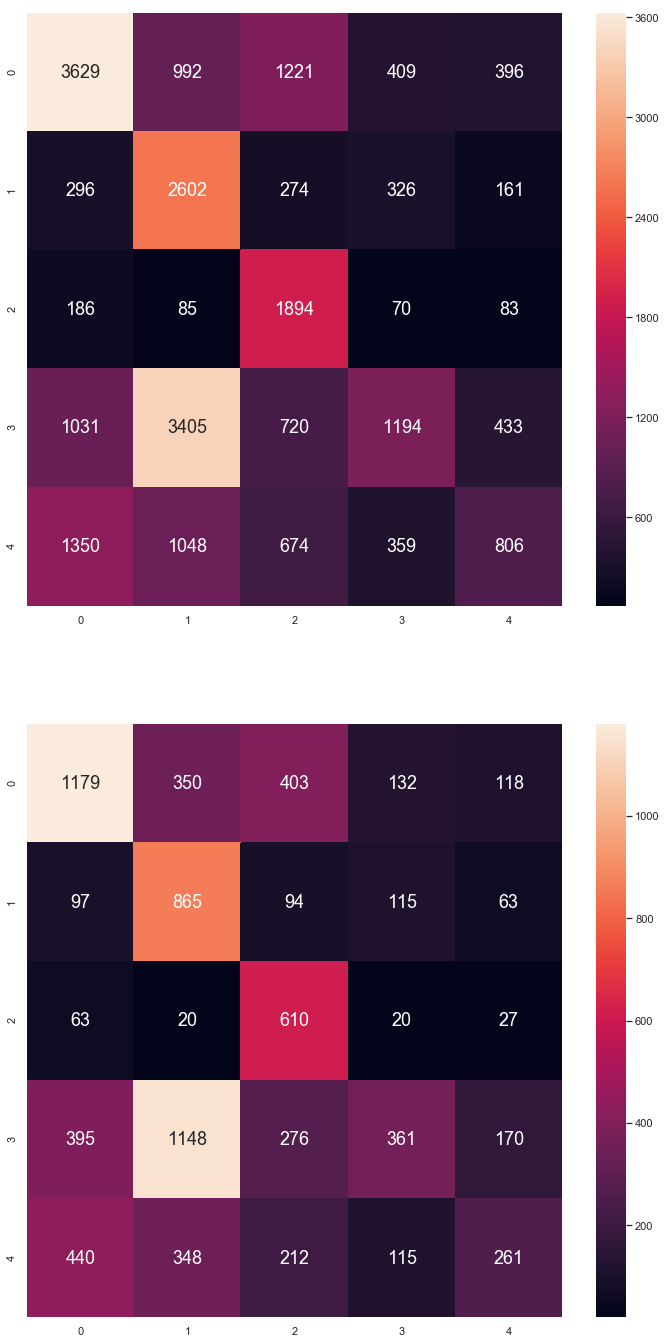

In [71]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(XW_train, yW_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(XW_test, yW_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(yW_train, yW_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yW_test, yW_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [72]:
# Extract IDs of players for Prediction
#winterOlympics.head(15)
winterOlympics_pred = winterOlympics[winterOlympics['ID'].isin([3605,6855,20192,20213,22368,41378,131782,131775])]
winterOlympics_pred

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal,BMI
4,3605,0,22.0,1.78,72.0,China,CHN,2006,Winter,Speed Skating,Speed Skating Men's 500 metres,NoMedal,22.712934
5,3605,0,22.0,1.78,72.0,China,CHN,2006,Winter,Speed Skating,"Speed Skating Men's 1,000 metres",NoMedal,22.712934
10,6855,0,19.0,1.73,70.0,China,CHN,2014,Winter,Speed Skating,Speed Skating Men's 500 metres,NoMedal,23.411371
62,20192,0,21.0,1.75,73.0,China,CHN,2006,Winter,Cross Country Skiing,Cross Country Skiing Men's Sprint,NoMedal,23.856209
72,20213,0,26.0,1.69,60.0,China,CHN,1984,Winter,Speed Skating,Speed Skating Men's 500 metres,NoMedal,20.979021
73,20213,0,26.0,1.69,60.0,China,CHN,1984,Winter,Speed Skating,"Speed Skating Men's 1,000 metres",NoMedal,20.979021
236278,131775,0,27.0,1.74,75.0,Chinese Taipei-2,TPE,1984,Winter,Bobsleigh,Bobsleigh Men's Two,NoMedal,24.752475
236279,131775,0,27.0,1.74,75.0,Chinese Taipei,TPE,1984,Winter,Bobsleigh,Bobsleigh Men's Four,NoMedal,24.752475
236280,131782,0,25.0,1.83,75.0,Chinese Taipei-1,TPE,1984,Winter,Bobsleigh,Bobsleigh Men's Two,NoMedal,22.388060
236281,131782,0,25.0,1.83,75.0,Chinese Taipei,TPE,1984,Winter,Bobsleigh,Bobsleigh Men's Four,NoMedal,22.388060


In [73]:
# Extract Predictors for Prediction
XW_pred = pd.DataFrame(winterOlympics_pred[predictors])

# Predict Response corresponding to Predictors
yW_pred = rforest.predict(XW_pred)
yW_pred

array(['Biathlon', 'Biathlon', 'Alpine Skiing', 'Alpine Skiing',
       'Cross Country Skiing', 'Cross Country Skiing', 'Bobsleigh',
       'Bobsleigh', 'Biathlon', 'Biathlon', 'Biathlon', 'Biathlon',
       'Biathlon', 'Biathlon', 'Biathlon', 'Biathlon', 'Biathlon',
       'Biathlon', 'Biathlon', 'Biathlon', 'Biathlon', 'Alpine Skiing'],
      dtype=object)

In [74]:
# Summarize the Actuals and Predictions
yW_pred = pd.DataFrame(yW_pred, columns = ["PredType"], index = winterOlympics_pred.index)
winterOlympics_acc = pd.concat([winterOlympics_pred[["ID", "Sport"]], yW_pred], axis = 1)
winterOlympics_acc

,ID,Sport,PredType
4,3605,Speed Skating,Biathlon
5,3605,Speed Skating,Biathlon
10,6855,Speed Skating,Alpine Skiing
62,20192,Cross Country Skiing,Alpine Skiing
72,20213,Speed Skating,Cross Country Skiing
73,20213,Speed Skating,Cross Country Skiing
236278,131775,Bobsleigh,Bobsleigh
236279,131775,Bobsleigh,Bobsleigh
236280,131782,Bobsleigh,Biathlon
236281,131782,Bobsleigh,Biathlon


In [75]:
# Predict Probabilities corresponding to Predictors
yW_prob = rforest.predict_proba(XW_pred)
np.set_printoptions(precision = 3)
print(yW_prob)

[[0.146 0.349 0.028 0.294 0.182]
 [0.146 0.349 0.028 0.294 0.182]
 [0.268 0.254 0.024 0.228 0.227]
 [0.316 0.201 0.051 0.189 0.243]
 [0.167 0.242 0.056 0.351 0.185]
 [0.167 0.242 0.056 0.351 0.185]
 [0.192 0.132 0.323 0.158 0.195]
 [0.192 0.132 0.323 0.158 0.195]
 [0.136 0.264 0.108 0.255 0.237]
 [0.136 0.264 0.108 0.255 0.237]
 [0.264 0.271 0.02  0.211 0.234]
 [0.264 0.271 0.02  0.211 0.234]
 [0.264 0.271 0.02  0.211 0.234]
 [0.264 0.271 0.02  0.211 0.234]
 [0.264 0.271 0.02  0.211 0.234]
 [0.17  0.318 0.035 0.241 0.235]
 [0.17  0.318 0.035 0.241 0.235]
 [0.17  0.318 0.035 0.241 0.235]
 [0.17  0.318 0.035 0.241 0.235]
 [0.163 0.326 0.036 0.245 0.23 ]
 [0.163 0.326 0.036 0.245 0.23 ]
 [0.319 0.145 0.11  0.15  0.276]]


## Dividing summer sports into different categories based on popularity, this made the classification accuracy better
They are converted in the following way :
Category A - 1
Category B - 2
Category C - 3
Category D - 4
Category E - 5

This is from wikipedia :

    Category	Individual Sport	                                Team Sport
    A	        athletics, aquatics, gymnastics	                    ——
    B	        cycling, tennis	                                    basketball, football, volleyball
    C	        archery, badminton, boxing, judo, rowing 
                shooting, table tennis, weightlifting	            ——
    D	        canoe/kayaking, equestrian, fencing, 
                sailing, taekwondo, triathlon, wrestling	        handball, field hockey
    E	        modern pentathlon, golf	                            rugby

C:\Users\Bruger\Anaconda3\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


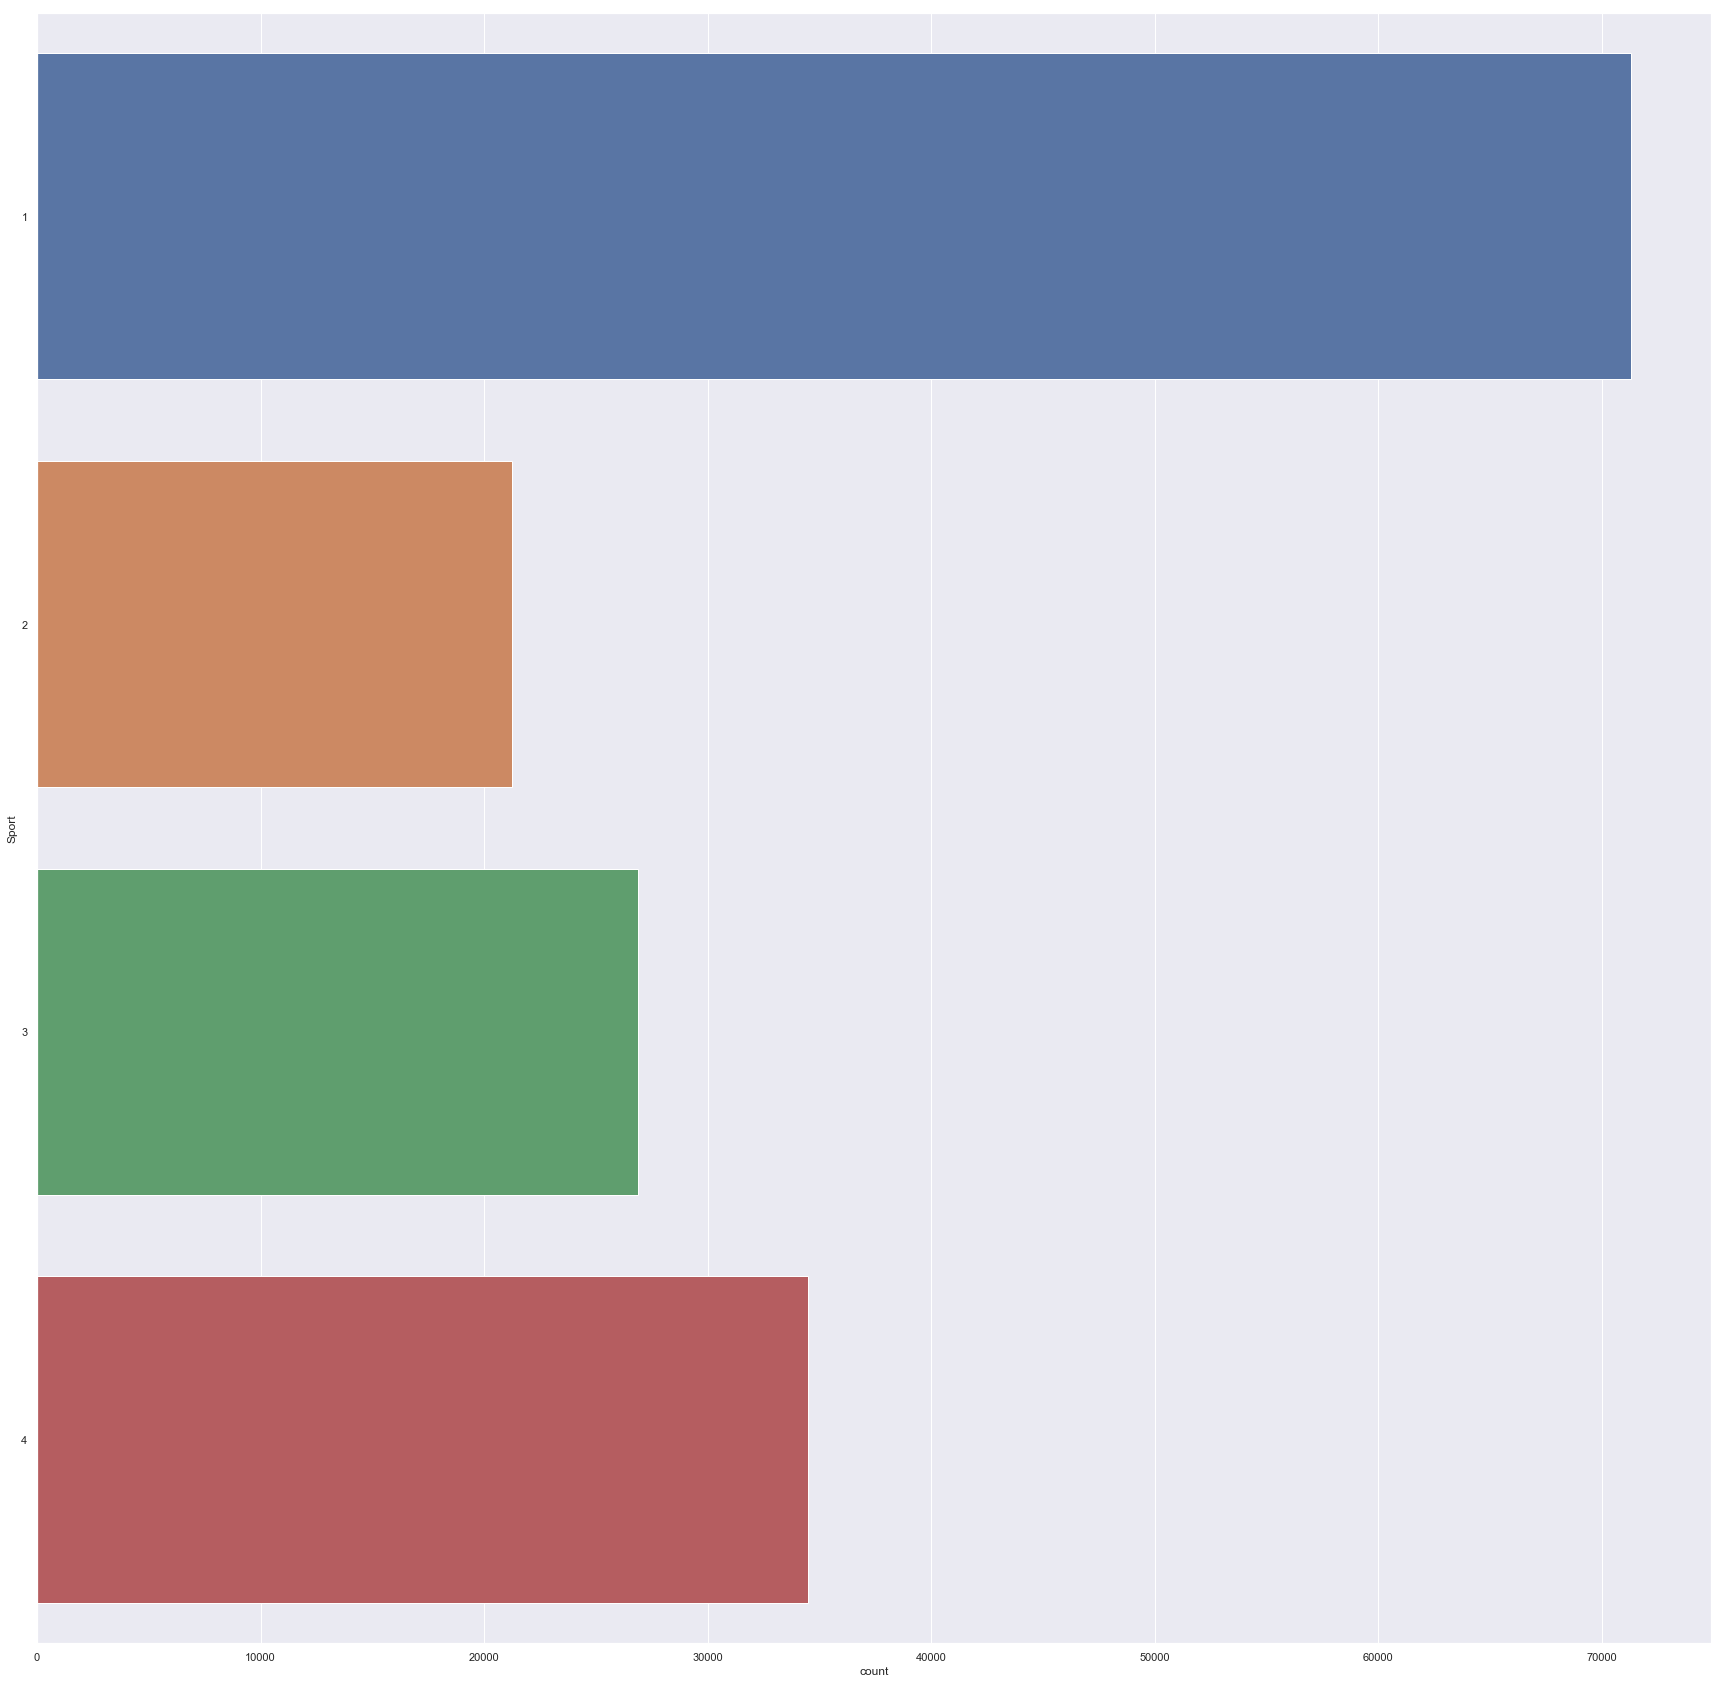

In [76]:
Sport = {'Sport' : {'Athletics':1,
                    'Gymnastics':1,
                    'Swimming':1,
                    'Shooting':3,
                    'Cycling':2,
                    'Fencing':4,
                    'Rowing':3,
                    'Wrestling':4,
                    'Football':2,        
                    'Sailing':4,
                    'Equestrianism':4,
                    'Canoeing':4,
                    'Boxing':3,
                    'Hockey':4,
                    'Basketball':2,
                    'Weightlifting':3,
                    'Water Polo':1,
                    'Judo':3,
                    'Handball':4,
                    'Volleyball':2,
                    'Diving':1,
                   'Tennis':2}}
summerOlympics.replace(Sport, inplace=True)

#Extract response and predictors for Summer olympics
yS = pd.DataFrame(summerOlympics['Sport'].astype('category'))
XS = pd.DataFrame(summerOlympics[predictors])
XS_train, XS_test, yS_train, yS_test = train_test_split(XS, yS, test_size = 0.25)

# Draw the distribution of Response
f, axes = plt.subplots(1, 1, figsize=(30, 30))
sb.countplot(y = yS_train['Sport'])

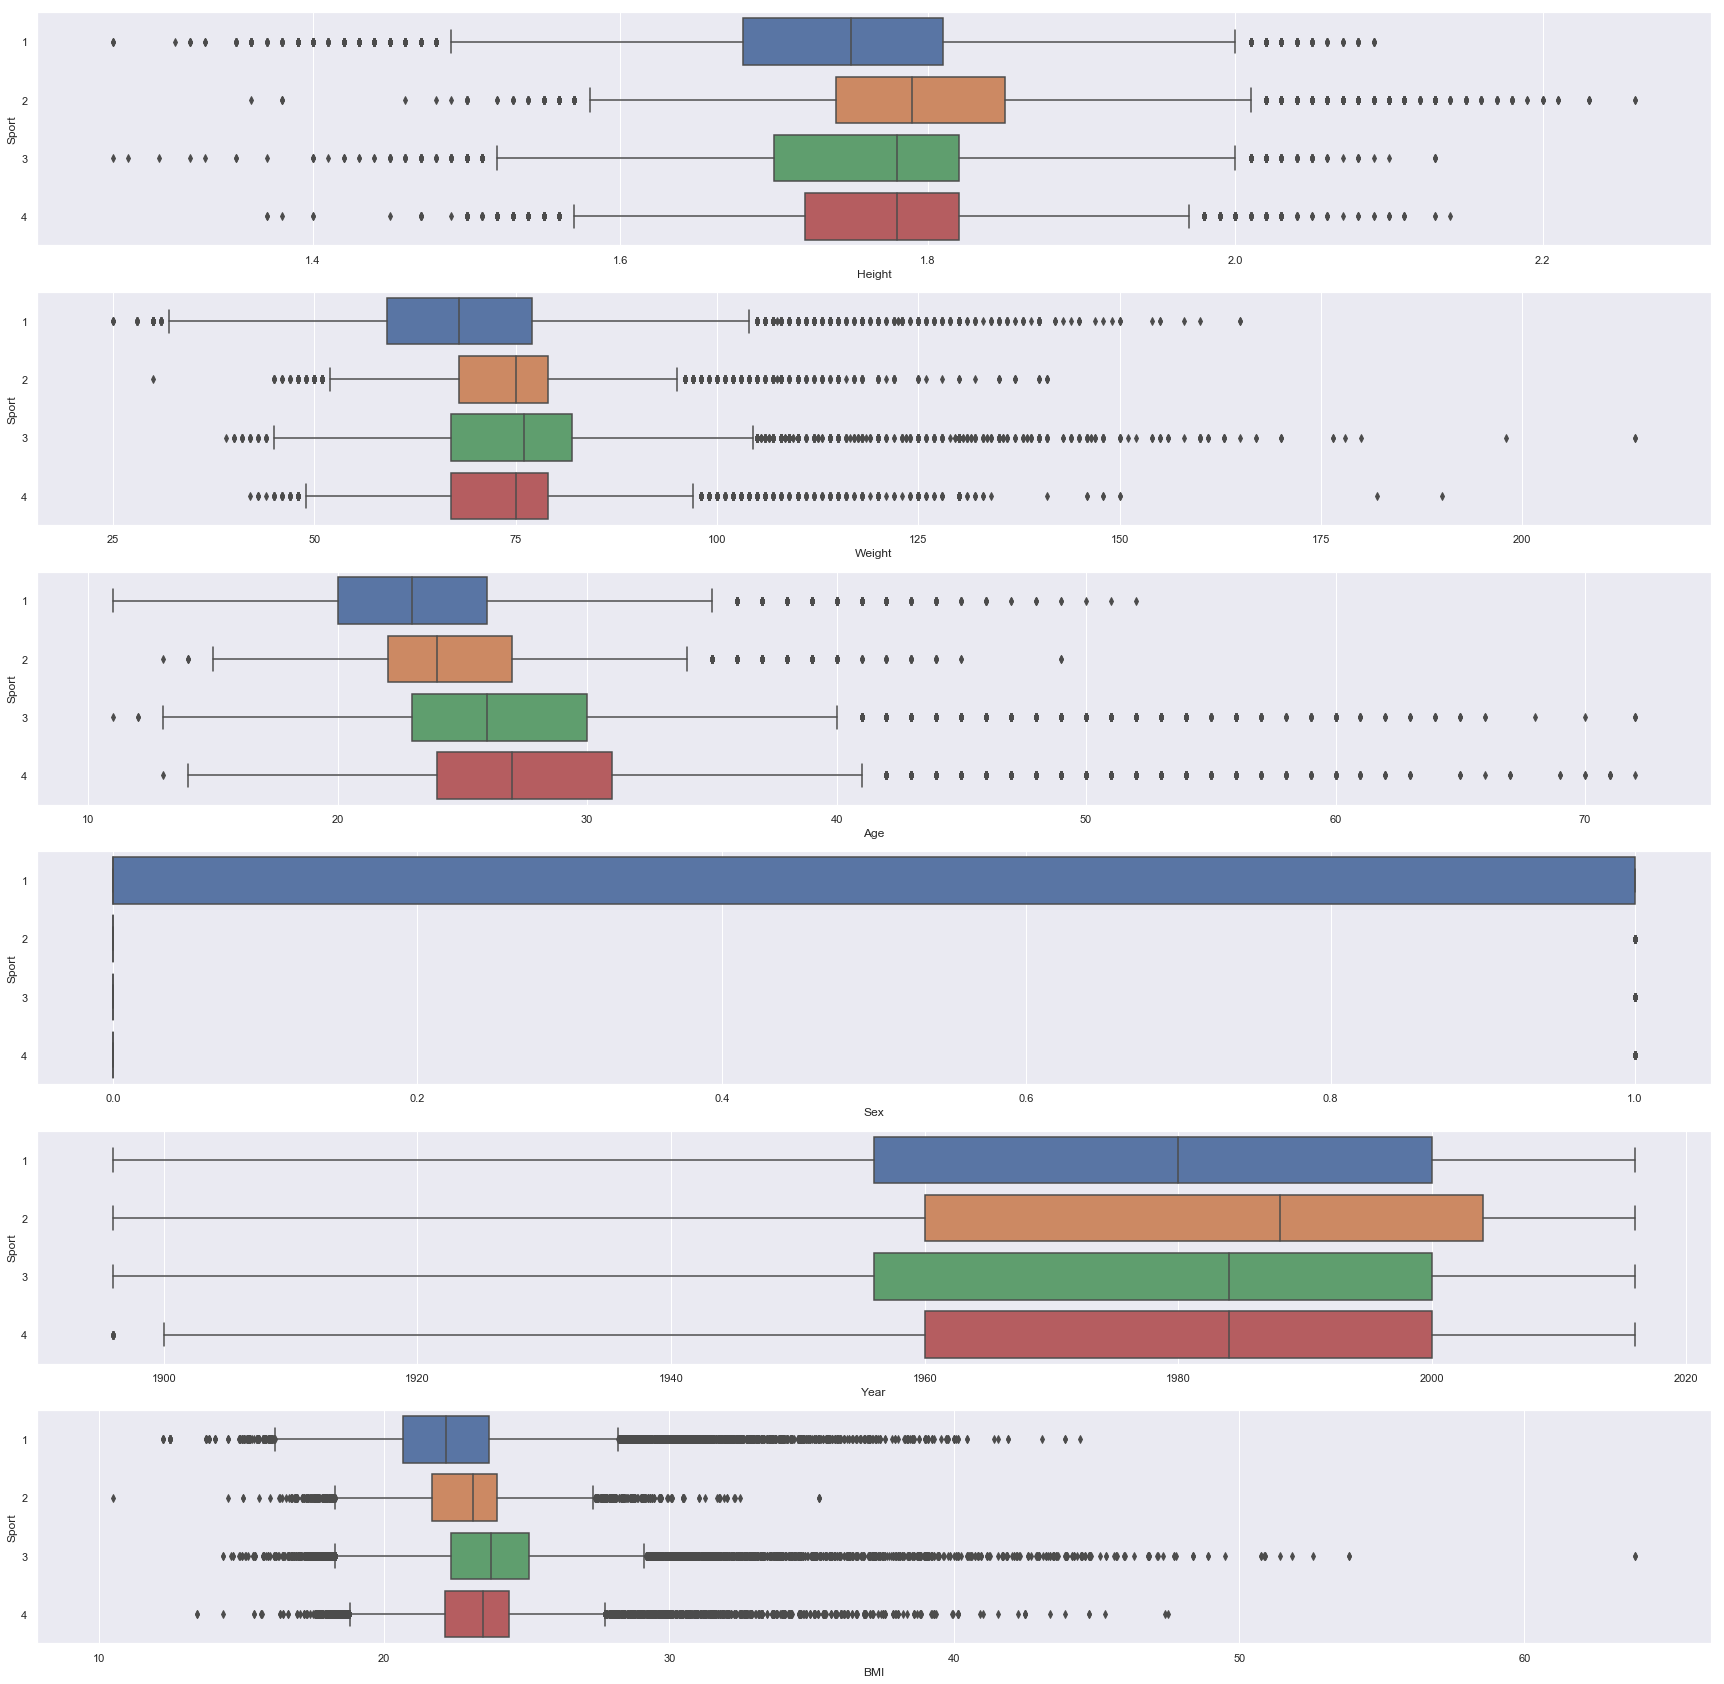

In [77]:
# Relationship between Response and the Predictors
trainDF = pd.concat([yS_train, XS_train], axis = 1, join_axes = [yS_train.index])

f, axes = plt.subplots(6, 1, figsize=(30, 30))

#sb.boxplot(x = 'BMI', y = 'Sport', data = trainDF, orient = 'h')

count = 0
for var in XS_train:
    sb.boxplot(x = var, y = 'Sport', data = trainDF, orient = "h", ax = axes[count])
    count += 1    

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4194273391015148

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4172188011536363



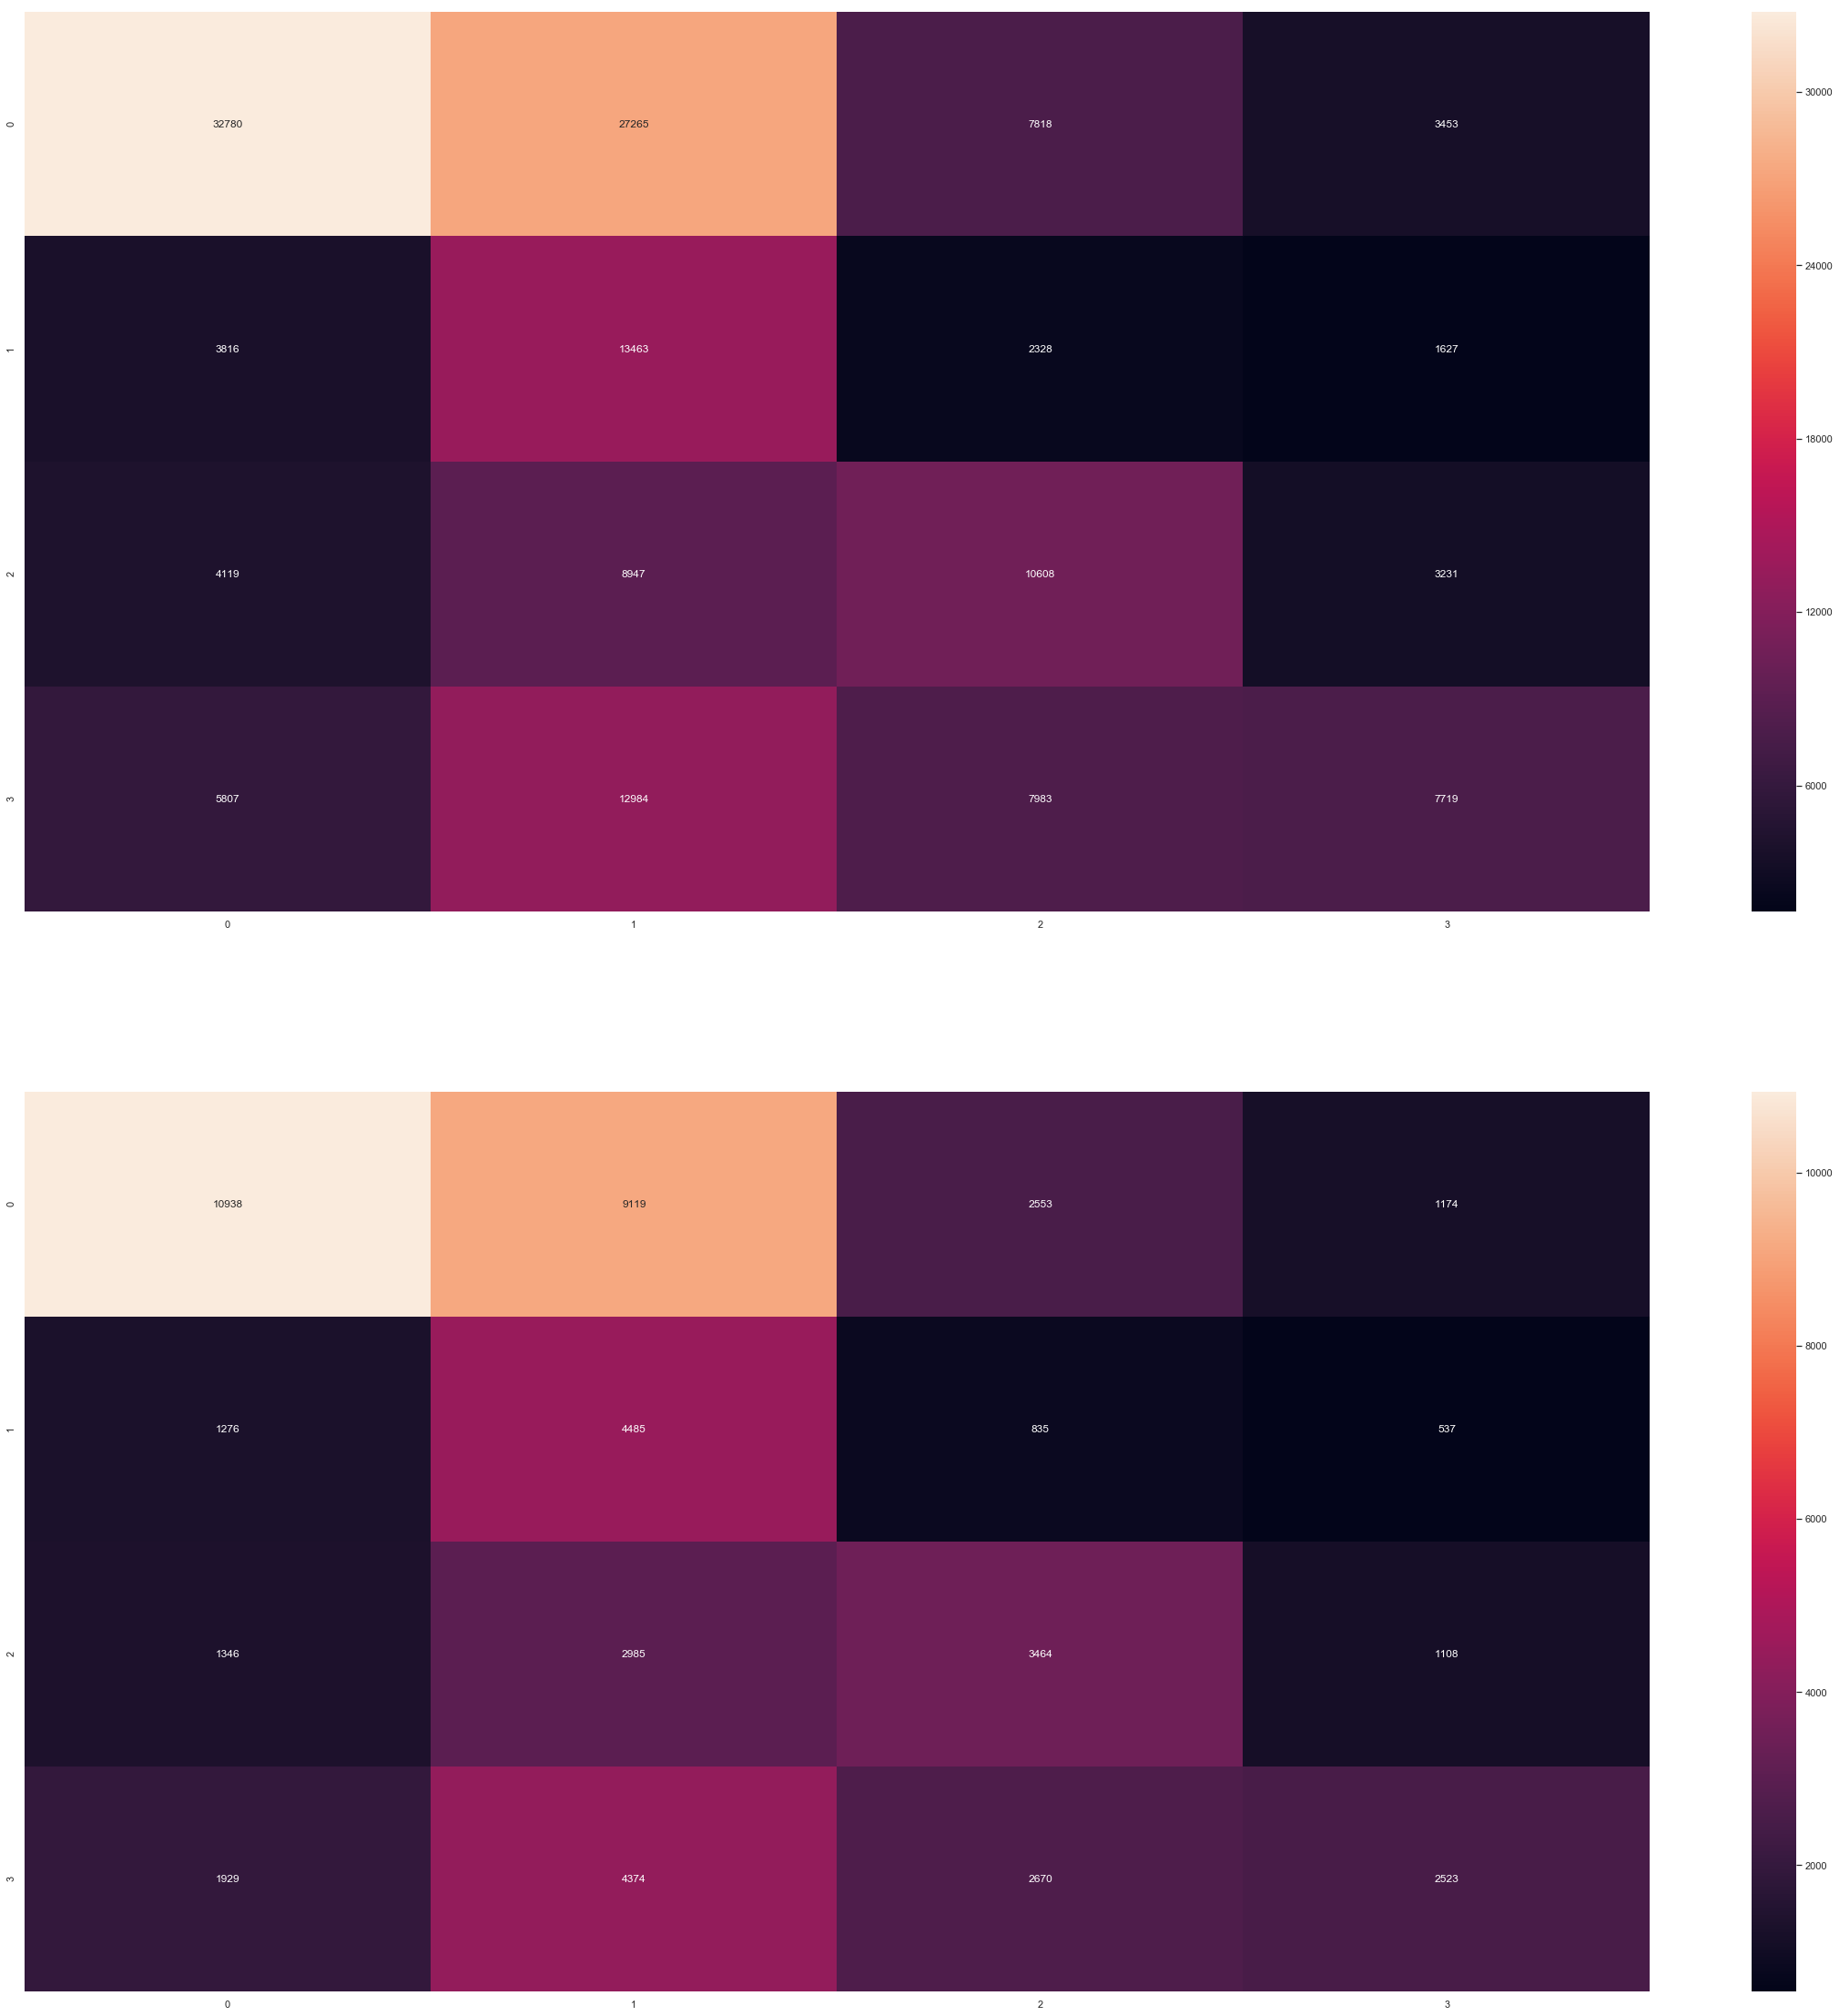

In [78]:
# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 5,class_weight="balanced")  # create the object
rforest.fit(XS_train, yS_train.values.ravel())                                        # train the model

# Predict Response corresponding to Predictors
yS_train_pred = rforest.predict(XS_train)
yS_test_pred = rforest.predict(XS_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(XS_train, yS_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(XS_test, yS_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(40, 40))
sb.heatmap(confusion_matrix(yS_train, yS_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 12}, ax = axes[0])
sb.heatmap(confusion_matrix(yS_test, yS_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 12}, ax = axes[1])

In [79]:
# Extract IDs of players for Prediction
#summerOlympics.head(15)
summerOlympics_pred = summerOlympics[summerOlympics['ID'].isin([1,2,602,1463,4639,4641,6382,6848,7596,11222,11225])]
summerOlympics_pred

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal,BMI
0,1,0,24.0,1.80,80.0,China,CHN,1992,Summer,2,Basketball Men's Basketball,NoMedal,24.691358
1,2,0,23.0,1.70,60.0,China,CHN,2012,Summer,3,Judo Men's Extra-Lightweight,NoMedal,20.761246
2,602,0,22.0,1.82,75.0,China,CHN,2000,Summer,3,Boxing Men's Middleweight,NoMedal,22.658610
3,1463,0,25.0,1.60,62.0,China,CHN,2004,Summer,4,"Wrestling Men's Lightweight, Greco-Roman",NoMedal,24.218750
6,4639,0,25.0,1.73,71.0,China,CHN,2008,Summer,4,Hockey Men's Hockey,NoMedal,23.745819
7,4641,0,21.0,1.81,90.0,China,CHN,1996,Summer,3,Judo Men's Middleweight,NoMedal,27.439024
8,6382,0,24.0,1.87,100.0,China,CHN,1996,Summer,4,"Wrestling Men's Heavyweight, Greco-Roman",NoMedal,28.571429
9,6848,0,21.0,1.84,83.0,China,CHN,1992,Summer,3,Boxing Men's Light-Heavyweight,NoMedal,24.483776
11,7596,0,27.0,1.77,55.0,China,CHN,1936,Summer,2,Football Men's Football,NoMedal,17.571885
12,11222,0,27.0,1.83,87.0,China,CHN,2016,Summer,4,"Wrestling Men's Light-Heavyweight, Freestyle",NoMedal,25.970149


In [80]:
# Extract Predictors for Prediction
XS_pred = pd.DataFrame(summerOlympics_pred[predictors])

# Predict Response corresponding to Predictors
yS_pred = rforest.predict(XS_pred)
yS_pred

array([3, 1, 2, 3, 2, 3, 3, 2, 1, 3, 3], dtype=int64)

In [81]:
# Summarize the Actuals and Predictions
yS_pred = pd.DataFrame(yS_pred, columns = ["PredType"], index = summerOlympics_pred.index)
summerOlympics_acc = pd.concat([summerOlympics_pred[["ID", "Sport"]], yS_pred], axis = 1)
summerOlympics_acc

,ID,Sport,PredType
0,1,2,3
1,2,3,1
2,602,3,2
3,1463,4,3
6,4639,4,2
7,4641,3,3
8,6382,4,3
9,6848,3,2
11,7596,2,1
12,11222,4,3


In [82]:
# Predict Probabilities corresponding to Predictors
yS_prob = rforest.predict_proba(XS_pred)
np.set_printoptions(precision = 3)
print(yS_prob)

[[0.174 0.255 0.29  0.28 ]
 [0.353 0.205 0.232 0.21 ]
 [0.256 0.356 0.177 0.211]
 [0.279 0.183 0.297 0.241]
 [0.208 0.303 0.227 0.263]
 [0.138 0.169 0.414 0.28 ]
 [0.144 0.152 0.42  0.284]
 [0.191 0.278 0.267 0.264]
 [0.365 0.175 0.302 0.158]
 [0.138 0.188 0.363 0.31 ]
 [0.179 0.112 0.451 0.258]]
